# Post hoc calibration by Temperature and Platt scaling of the Perch v2 model on BirdSet

In [1]:
from matplotlib import pyplot as plt


plt.style.use("seaborn-v0_8")

In [2]:
from uncertainbird.utils.misc import load_data
from uncertainbird.modules.models.convnext_bs import ConvNeXtBS

log_dir = "/workspace/logs/predictions/convnext_bs"
data, predictions, targets, valid_keys = load_data(log_dir, load_logits=True)
model = ConvNeXtBS()
model_name = 'ConvNeXT_BS'

/workspace/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/workspace/.venv/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


Loaded data with 12000 samples
Predictions shape: torch.Size([12000, 9736])
Targets shape: torch.Size([12000, 9736])
Loaded data with 539 samples
Predictions shape: torch.Size([539, 9736])
Targets shape: torch.Size([539, 9736])
Loaded data with 24480 samples
Predictions shape: torch.Size([24480, 9736])
Targets shape: torch.Size([24480, 9736])
Loaded data with 15120 samples
Predictions shape: torch.Size([15120, 9736])
Targets shape: torch.Size([15120, 9736])
Loaded data with 4560 samples
Predictions shape: torch.Size([4560, 9736])
Targets shape: torch.Size([4560, 9736])
Loaded data with 23756 samples
Predictions shape: torch.Size([23756, 9736])
Targets shape: torch.Size([23756, 9736])
Loaded data with 205200 samples
Predictions shape: torch.Size([205200, 9736])
Targets shape: torch.Size([205200, 9736])
Loaded data with 36637 samples
Predictions shape: torch.Size([36637, 9736])
Targets shape: torch.Size([36637, 9736])


/workspace/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
data["POW"].keys()
model_name = 'ConvNeXT_BS'

In [4]:
from uncertainbird.utils.misc import prune_non_target_classes

data = prune_non_target_classes(data, targets)

# Temperature scaling on POW validation set

In [5]:
from uncertainbird.utils.temperature_scaling import (
    fit_global_temperature,
    apply_temperature_scaling,
)
class_index = 10
data_POW = data

# compute global temperature value based on POW
temperature = fit_global_temperature(
    data_POW["POW"]["logits"], data_POW["POW"]["targets"], 1000, lr=0.001
)

print(f"Optimal temperature: {temperature:.3f}")

# apply temperature scaling to all test datasets
for dataset_name in valid_keys:

    data_POW[dataset_name]["predictions_ts"] = apply_temperature_scaling(
        data_POW[dataset_name]["logits"], temperature, model= model
    )

Optimal temperature: 1.540


Dataset: HSN
Before temperature scaling:


/workspace/.venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Average precision score for one or more classes was `nan`. Ignoring these classes in macro-average
  warnings.warn(*args, **kwargs)  # noqa: B028
/workspace/.venv/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/workspace/.venv/lib/python3.10/site-packages/torchmetrics/functional/classification/calibration_error.py:48: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at /pytorch/aten/src/ATen/native/BucketizationUtils.h:32.)
  indices = torch.buc

Accuracy: tensor(0.9988)
cmAP: tensor(0.4872)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0012)
ECE Weighted: tensor(0.1181)
ECE Top-3: tensor(0.1177)
ECE Top-5: tensor(0.0854)
ECE Top-10: tensor(0.0474)
ECE Top-21: tensor(0.0229)
Miscalibration Score (MCS): tensor(-0.1180)
ECE Under-confidence: tensor(0.1180)
ECE Over-confidence: tensor(3.3722e-05)
After temperature scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4872)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0026)
ECE Weighted: tensor(0.1133)
ECE Top-3: tensor(0.1132)
ECE Top-5: tensor(0.0805)
ECE Top-10: tensor(0.0441)
ECE Top-21: tensor(0.0233)
Miscalibration Score (MCS): tensor(-0.1130)
ECE Under-confidence: tensor(0.1132)
ECE Over-confidence: tensor(0.0001)
Dataset: NBP
Before temperature scaling:
Accuracy: tensor(0.9964)
cmAP: tensor(0.6136)
Precision: tensor(0.0753)
Recall: tensor(0.0211)
F1 Sc

Accuracy: tensor(0.9990)
cmAP: tensor(0.3414)
Precision: tensor(0.0941)
Recall: tensor(0.0318)
F1 Score: tensor(0.0415)
AUROC: tensor(0.1900)
ECE: tensor(0.0027)
ECE Weighted: tensor(0.0206)
ECE Top-3: tensor(0.0397)
ECE Top-5: tensor(0.0277)
ECE Top-10: tensor(0.0184)
ECE Top-21: tensor(0.0111)
Miscalibration Score (MCS): tensor(-0.0175)
ECE Under-confidence: tensor(0.0191)
ECE Over-confidence: tensor(0.0015)
Dataset: PER
Before temperature scaling:
Accuracy: tensor(0.9941)
cmAP: tensor(0.1760)
Precision: tensor(0.1070)
Recall: tensor(0.0129)
F1 Score: tensor(0.0182)
AUROC: tensor(0.2332)
ECE: tensor(0.0056)
ECE Weighted: tensor(0.1113)
ECE Top-3: tensor(0.2181)
ECE Top-5: tensor(0.1725)
ECE Top-10: tensor(0.1134)
ECE Top-21: tensor(0.0754)
Miscalibration Score (MCS): tensor(-0.1099)
ECE Under-confidence: tensor(0.1106)
ECE Over-confidence: tensor(0.0007)
After temperature scaling:
Accuracy: tensor(0.9941)
cmAP: tensor(0.1760)
Precision: tensor(0.1070)
Recall: tensor(0.0129)
F1 Score:

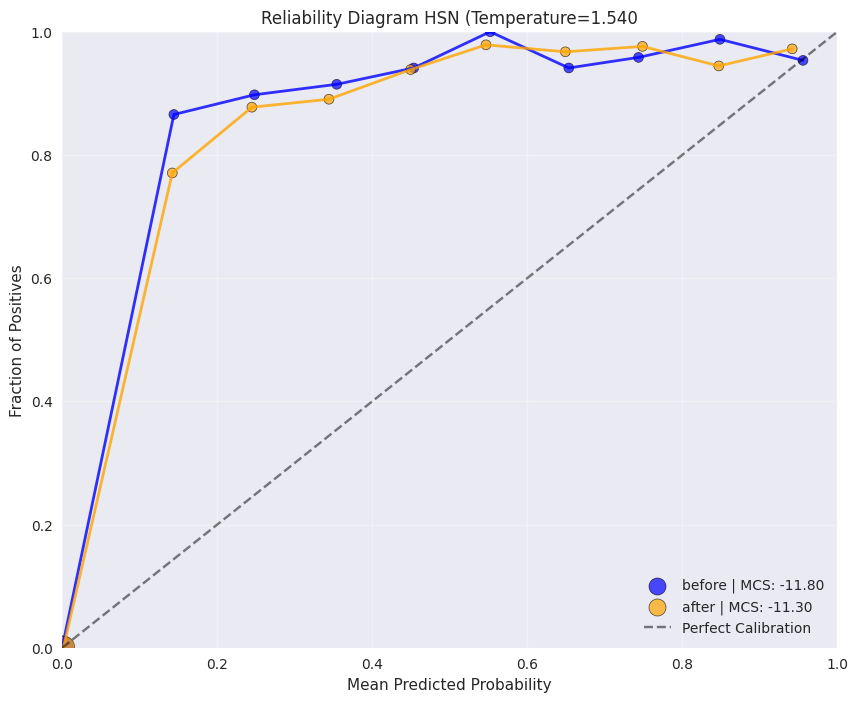

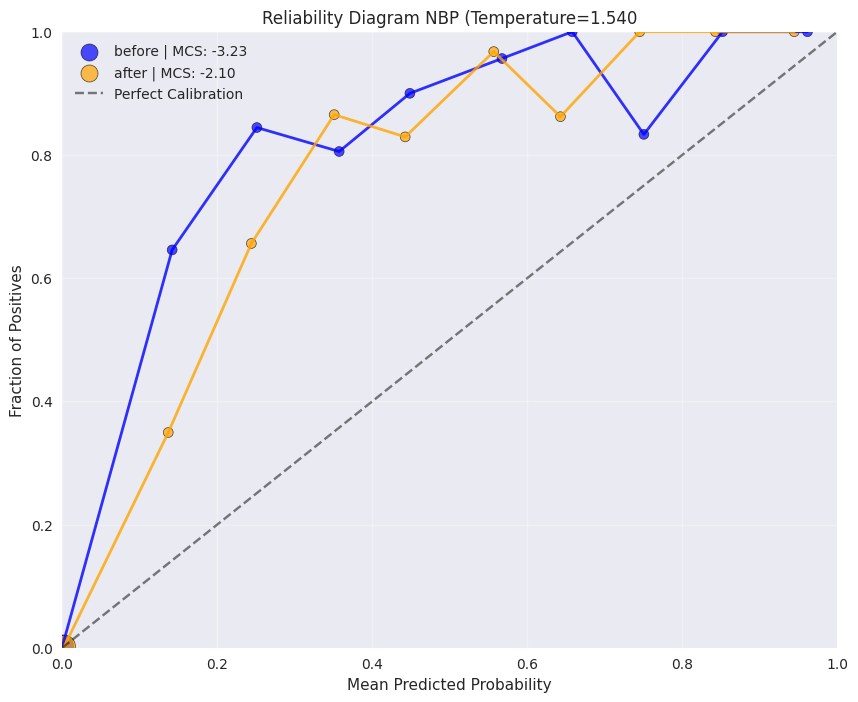

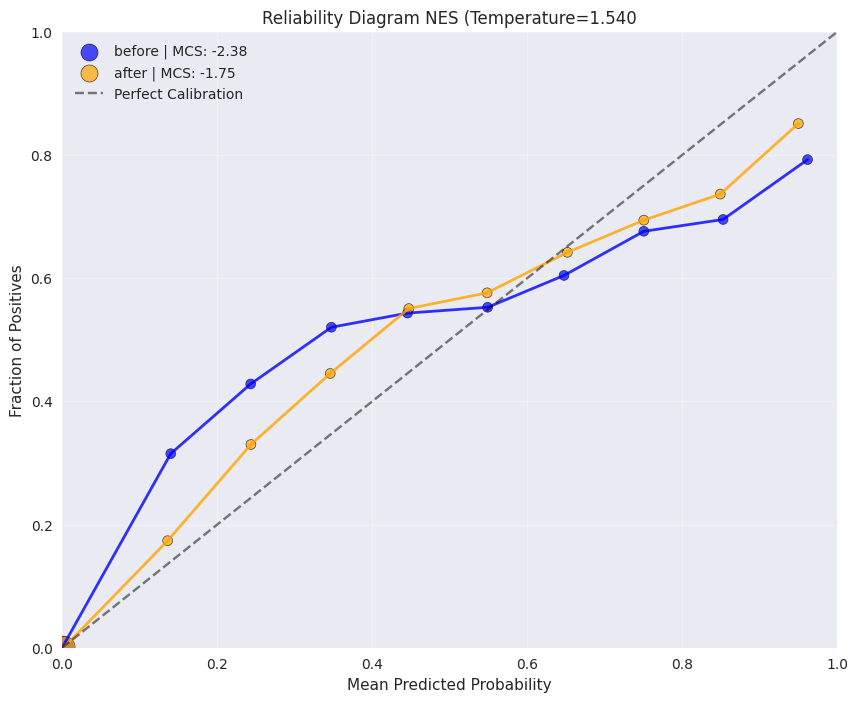

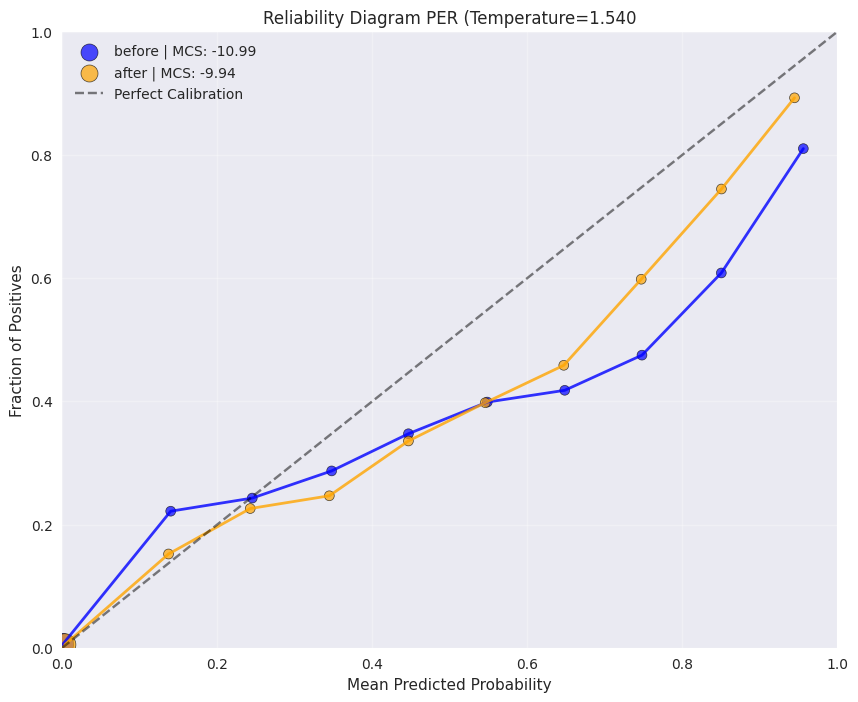

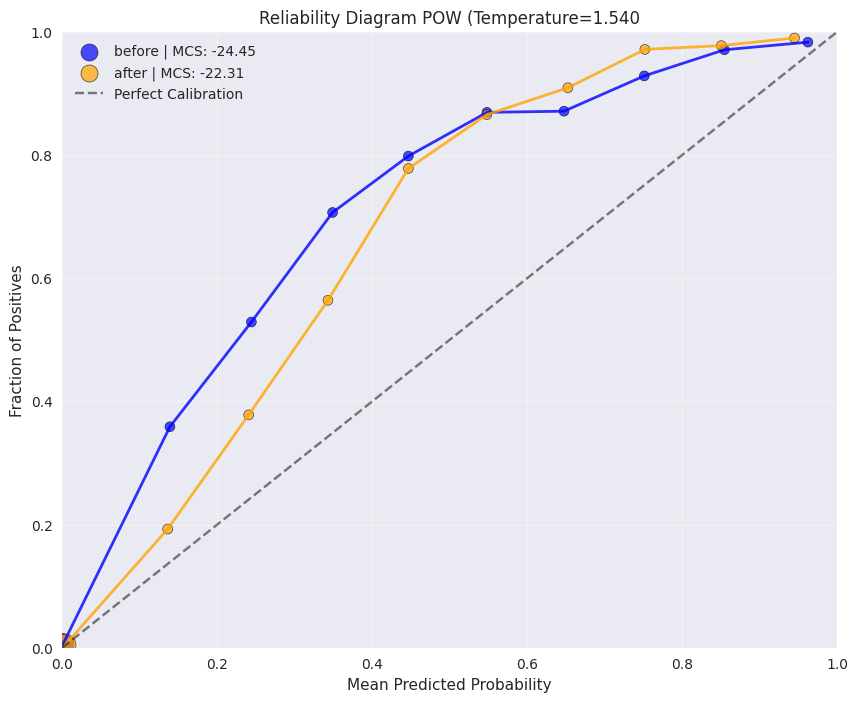

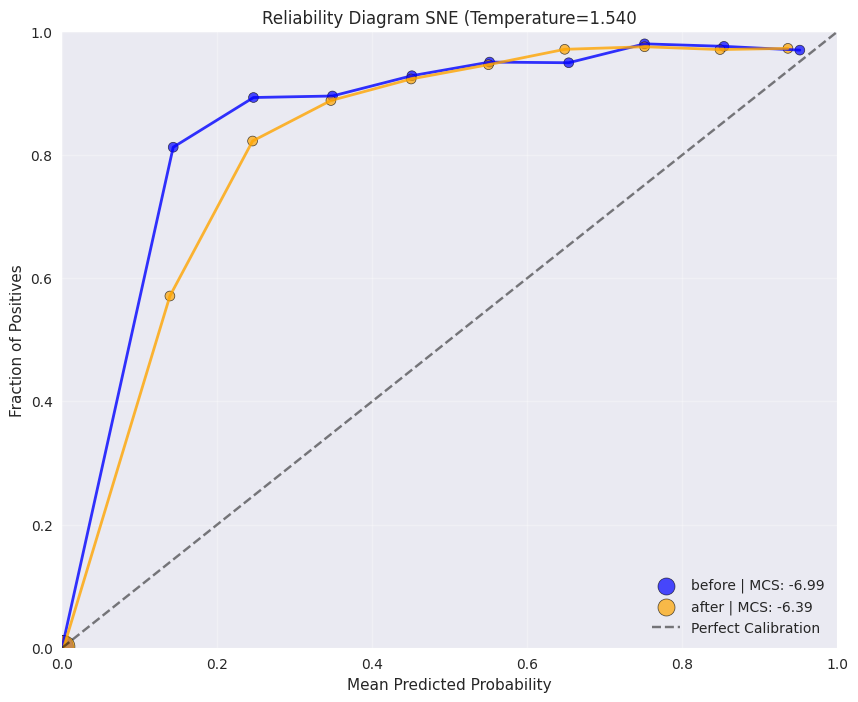

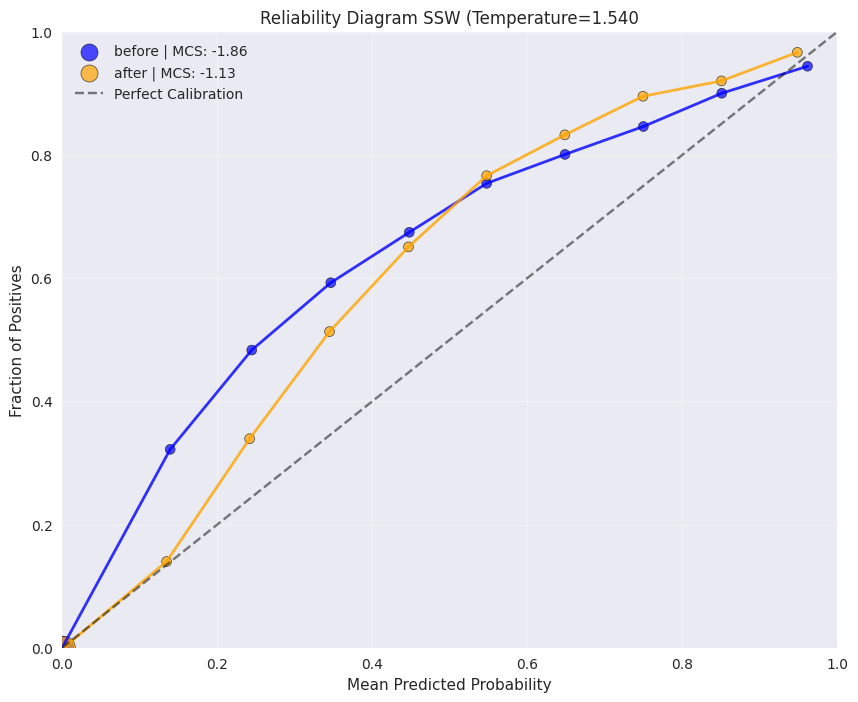

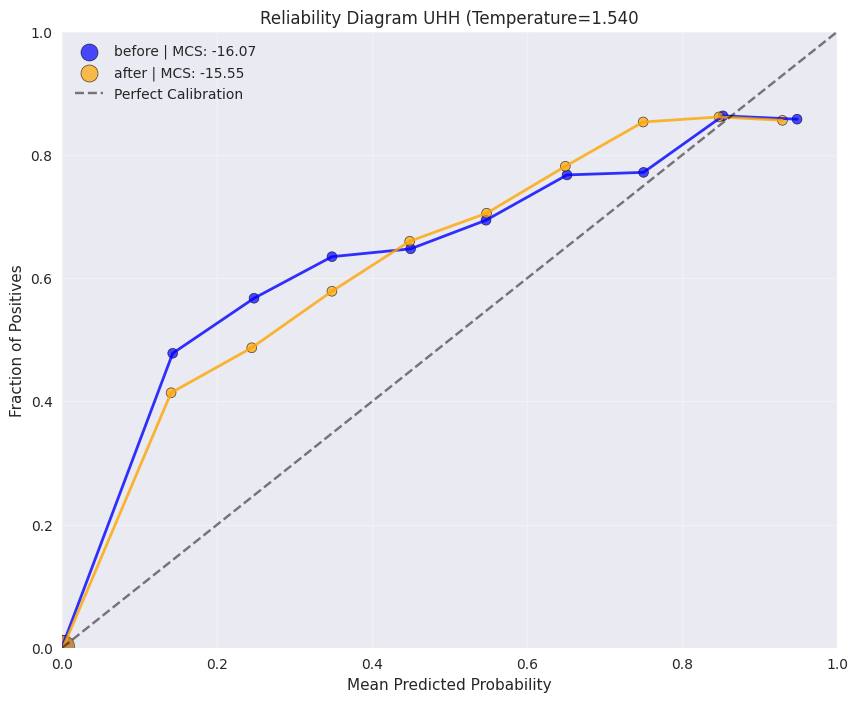

In [6]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
    print_metrics,
)


for dataset_name in valid_keys:
    print("Dataset:", dataset_name)
    print("Before temperature scaling:")
    data_POW[dataset_name]["metrics"] = print_metrics(
        data_POW[dataset_name]["predictions"], data_POW[dataset_name]["targets"]
    )
    print("After temperature scaling:")
    data_POW[dataset_name]["metrics_ts"] = print_metrics(
        data_POW[dataset_name]["predictions_ts"], data_POW[dataset_name]["targets"]
    )
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data_POW[dataset_name]["predictions"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "blue",
            "metrics": data_POW[dataset_name]["metrics"],
        },
        "after": {
            "predictions": data_POW[dataset_name]["predictions_ts"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "orange",
            "metrics": data_POW[dataset_name]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram {dataset_name} (Temperature={temperature:.3f}",
    )

# Platt scaling on POW validation set

In [7]:
from uncertainbird.utils.temperature_scaling import (
    fit_global_platt_scaling,
    apply_platt_scaling
)
class_index = 10
data_POW = data

# compute global temperature value based on POW
slope, bias = fit_global_platt_scaling(
    data_POW["POW"]["logits"], data_POW["POW"]["targets"], 1000, lr=0.01
)

print(f"Optimal slope: {slope:.3f}, bias: {bias:.3f}")

# apply temperature scaling to all test datasets
for dataset_name in valid_keys:

    data_POW[dataset_name]["predictions_ts"] = apply_platt_scaling(
        data_POW[dataset_name]["logits"], slope, bias, model= model
    )

Optimal slope: 0.841, bias: 1.367


Dataset: HSN
Before platt scaling:


Accuracy: tensor(0.9988)
cmAP: tensor(0.4872)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0012)
ECE Weighted: tensor(0.1181)
ECE Top-3: tensor(0.1177)
ECE Top-5: tensor(0.0854)
ECE Top-10: tensor(0.0474)
ECE Top-21: tensor(0.0229)
Miscalibration Score (MCS): tensor(-0.1180)
ECE Under-confidence: tensor(0.1180)
ECE Over-confidence: tensor(3.3722e-05)
After temperature scaling:
Accuracy: tensor(0.9989)
cmAP: tensor(0.4872)
Precision: tensor(0.0344)
Recall: tensor(0.0095)
F1 Score: tensor(0.0135)
AUROC: tensor(0.0454)
ECE: tensor(0.0020)
ECE Weighted: tensor(0.1069)
ECE Top-3: tensor(0.1080)
ECE Top-5: tensor(0.0765)
ECE Top-10: tensor(0.0418)
ECE Top-21: tensor(0.0222)
Miscalibration Score (MCS): tensor(-0.1066)
ECE Under-confidence: tensor(0.1067)
ECE Over-confidence: tensor(0.0001)
Dataset: NBP
Before platt scaling:
Accuracy: tensor(0.9964)
cmAP: tensor(0.6136)
Precision: tensor(0.0753)
Recall: tensor(0.0211)
F1 Score: t

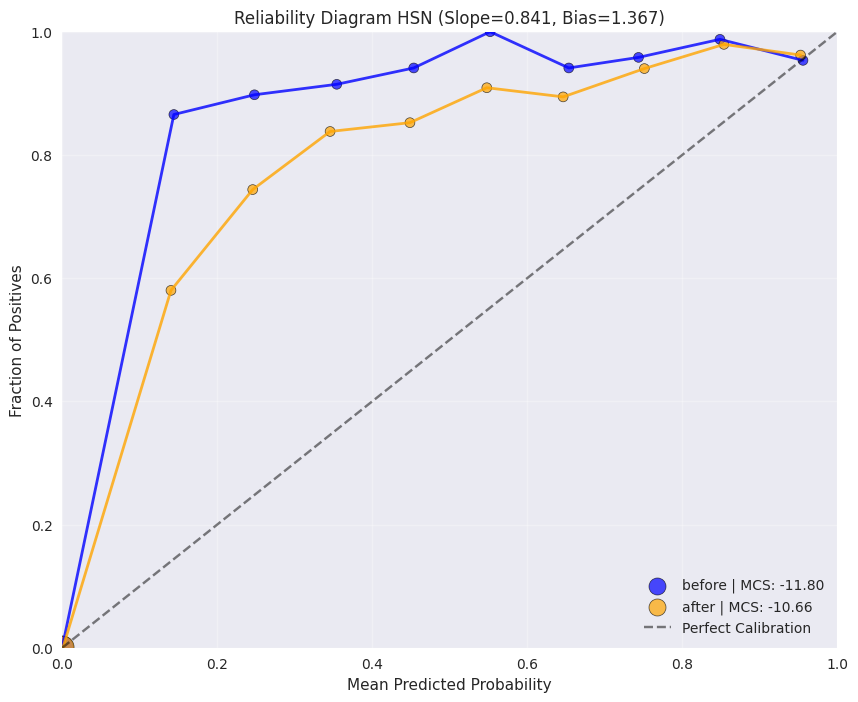

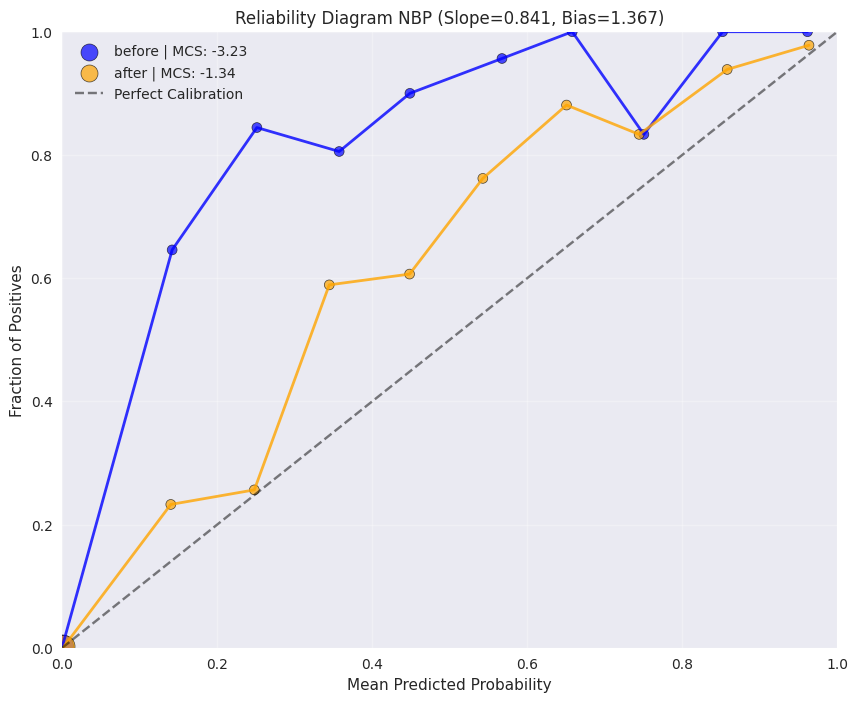

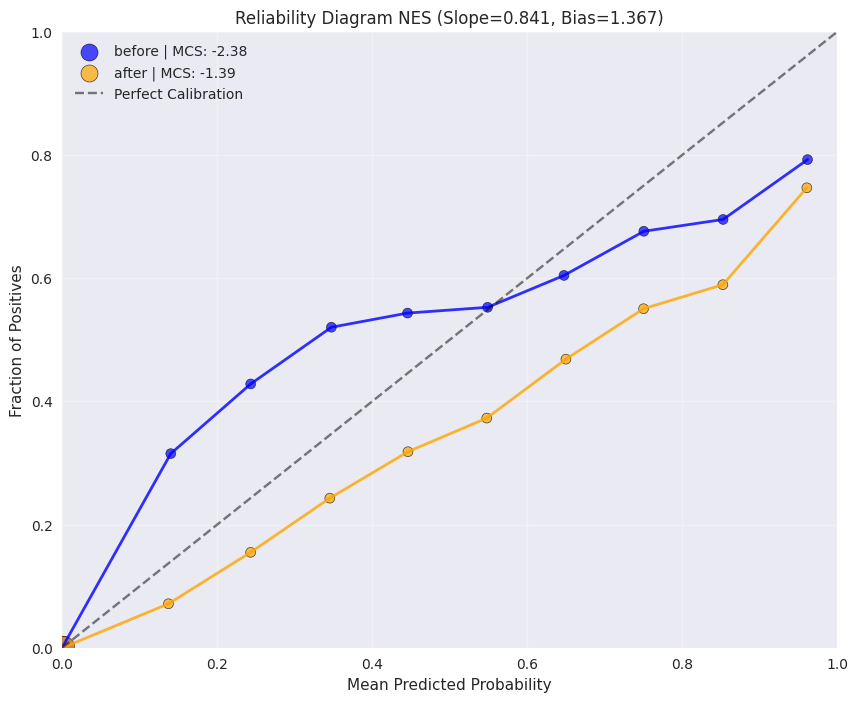

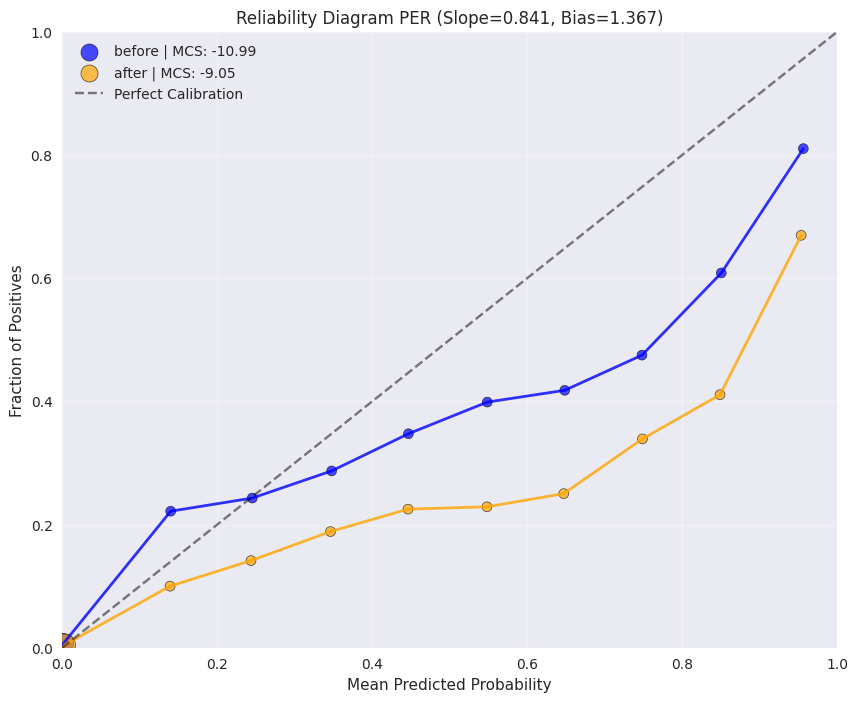

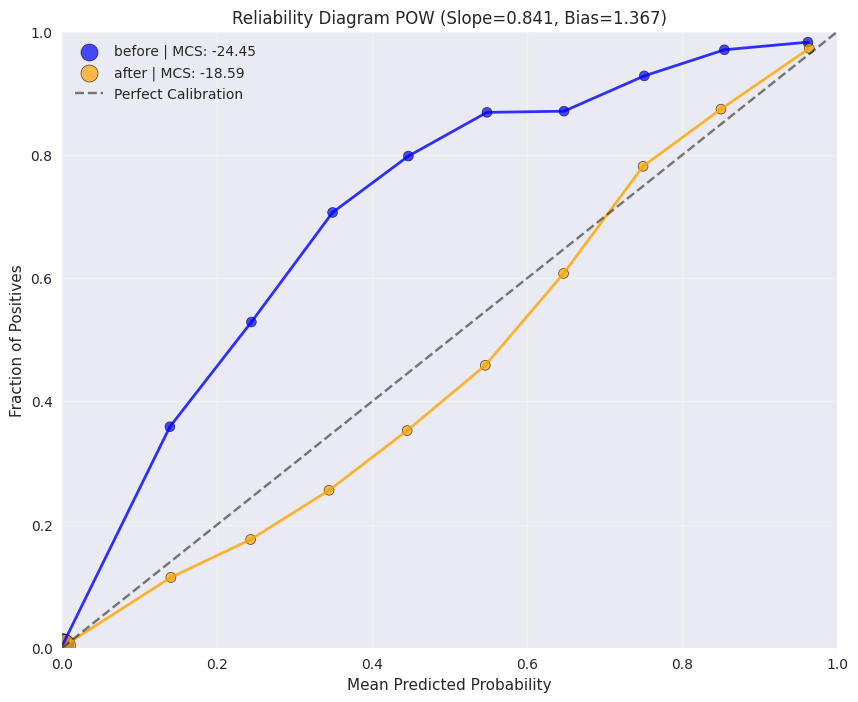

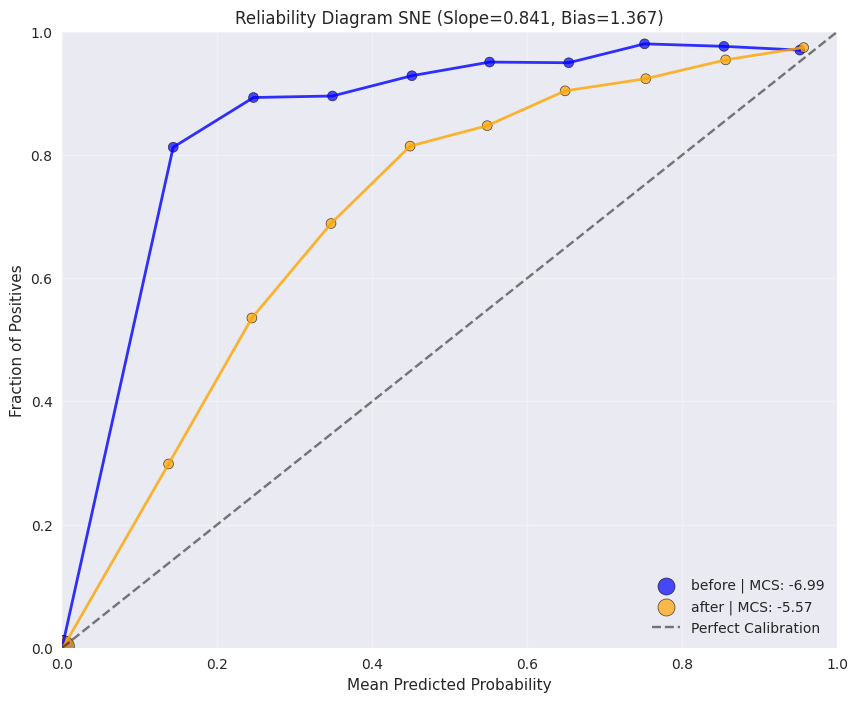

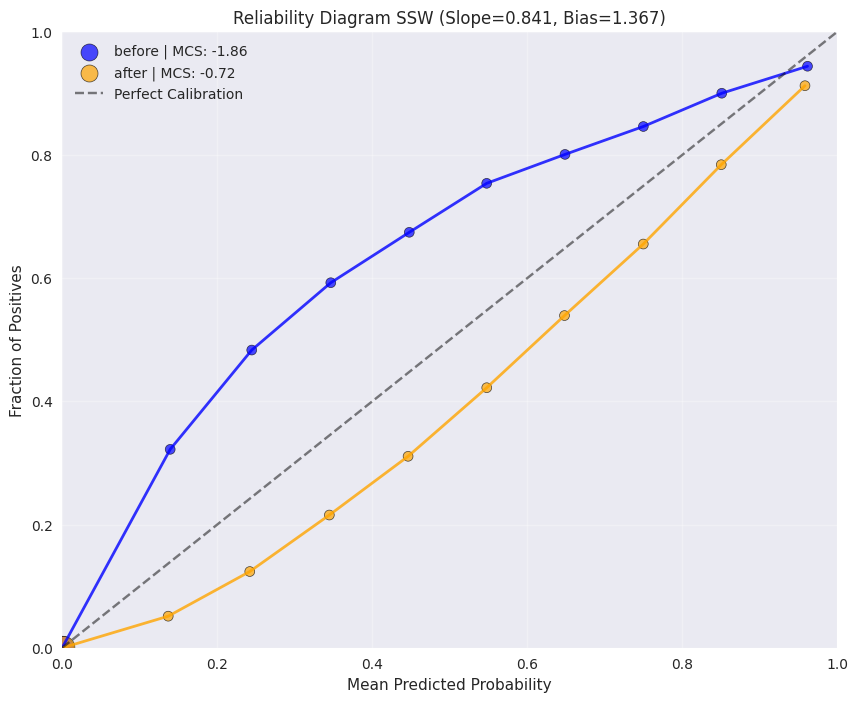

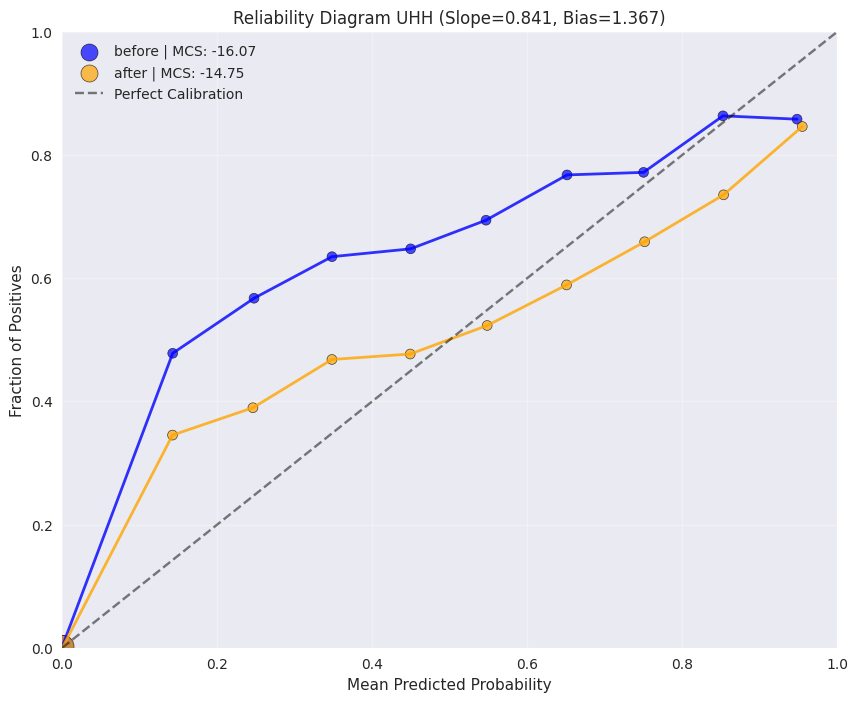

In [8]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
    print_metrics,
)


for dataset_name in valid_keys:
    print("Dataset:", dataset_name)
    print("Before platt scaling:")
    data_POW[dataset_name]["metrics"] = print_metrics(
        data_POW[dataset_name]["predictions"], data_POW[dataset_name]["targets"]
    )
    print("After temperature scaling:")
    data_POW[dataset_name]["metrics_ts"] = print_metrics(
        data_POW[dataset_name]["predictions_ts"], data_POW[dataset_name]["targets"]
    )
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data_POW[dataset_name]["predictions"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "blue",
            "metrics": data_POW[dataset_name]["metrics"],
        },
        "after": {
            "predictions": data_POW[dataset_name]["predictions_ts"],
            "targets": data_POW[dataset_name]["targets"],
            "color": "orange",
            "metrics": data_POW[dataset_name]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram {dataset_name} (Slope={slope:.3f}, Bias={bias:.3f})",
    )

# Platt scaling using a porton of the test data

In [9]:
from uncertainbird.utils.misc import slit_based_on_first_n_samples

# 10min of audio per class -> 120 samples of 5s each
data_120 = slit_based_on_first_n_samples(data, n=120)

## Global parameters for all classes

### Temperature scaling

In [10]:
for ds in valid_keys:

    # compute global temperature value based on POW
    temperature = fit_global_temperature(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )

    print(f"Optimal temperature: {temperature:.3f} for {ds}")

    data_120[ds+'_test']["predictions_ts"] = apply_temperature_scaling(
        data_120[ds+'_test']["logits"], temperature, model= model
    )
    print('Before temperature scaling:')
    data_120[ds+'_test']["metrics"] = print_metrics(
        data_120[ds+'_test']["predictions"], data_120[ds+'_test']["targets"]
    )
    print('After temperature scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Optimal temperature: 1.346 for HSN
Before temperature scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4871)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0012)
ECE Weighted: tensor(0.1182)
ECE Top-3: tensor(0.1179)
ECE Top-5: tensor(0.0856)
ECE Top-10: tensor(0.0474)
ECE Top-21: tensor(0.0230)
Miscalibration Score (MCS): tensor(-0.1182)
ECE Under-confidence: tensor(0.1182)
ECE Over-confidence: tensor(3.4392e-05)
After temperature scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4871)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0017)
ECE Weighted: tensor(0.1157)
ECE Top-3: tensor(0.1156)
ECE Top-5: tensor(0.0830)
ECE Top-10: tensor(0.0453)
ECE Top-21: tensor(0.0228)
Miscalibration Score (MCS): tensor(-0.1156)
ECE Under-confidence: tensor(0.1156)
ECE Over-confidence: tensor(4.9896e-05)
Optimal temperature: 1.406 for NBP
Before temperature scaling:


Accuracy: tensor(0.9965)
cmAP: tensor(0.6088)
Precision: tensor(0.0730)
Recall: tensor(0.0206)
F1 Score: tensor(0.0285)
AUROC: tensor(0.1129)
ECE: tensor(0.0032)
ECE Weighted: tensor(0.0334)
ECE Top-3: tensor(0.0581)
ECE Top-5: tensor(0.0560)
ECE Top-10: tensor(0.0494)
ECE Top-21: tensor(0.0404)
Miscalibration Score (MCS): tensor(-0.0329)
ECE Under-confidence: tensor(0.0331)
ECE Over-confidence: tensor(0.0003)
After temperature scaling:
Accuracy: tensor(0.9965)
cmAP: tensor(0.6088)
Precision: tensor(0.0730)
Recall: tensor(0.0206)
F1 Score: tensor(0.0285)
AUROC: tensor(0.1129)
ECE: tensor(0.0035)
ECE Weighted: tensor(0.0283)
ECE Top-3: tensor(0.0508)
ECE Top-5: tensor(0.0491)
ECE Top-10: tensor(0.0422)
ECE Top-21: tensor(0.0331)
Miscalibration Score (MCS): tensor(-0.0257)
ECE Under-confidence: tensor(0.0270)
ECE Over-confidence: tensor(0.0013)
Optimal temperature: 1.245 for NES
Before temperature scaling:
Accuracy: tensor(0.9990)
cmAP: tensor(0.3447)
Precision: tensor(0.0942)
Recall: te

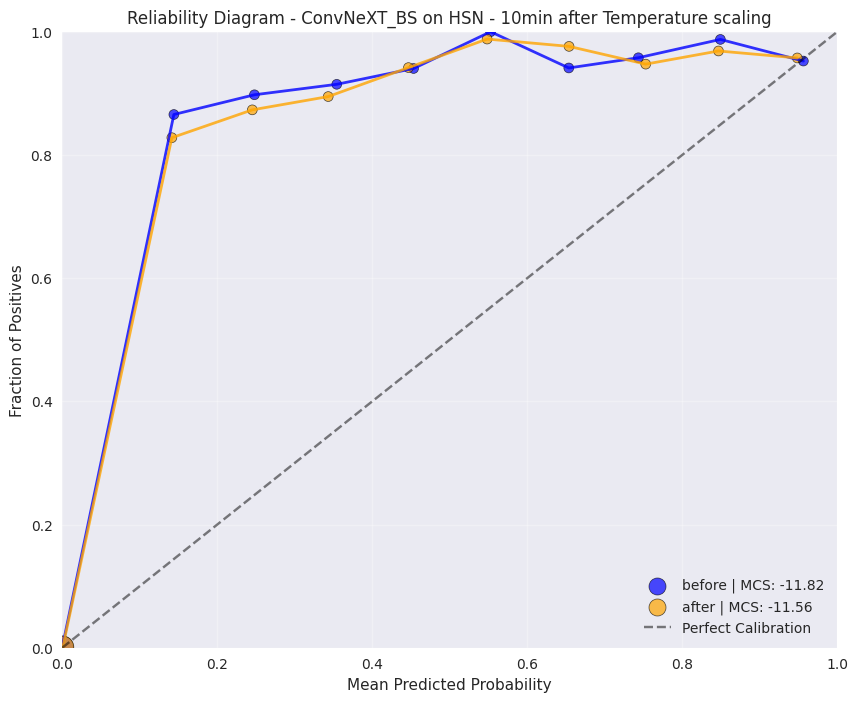

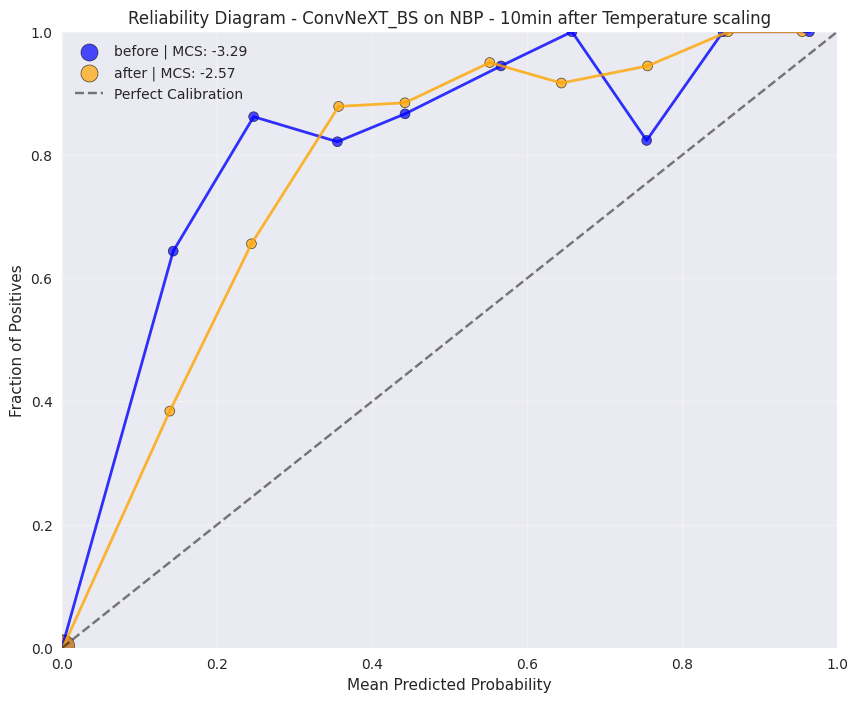

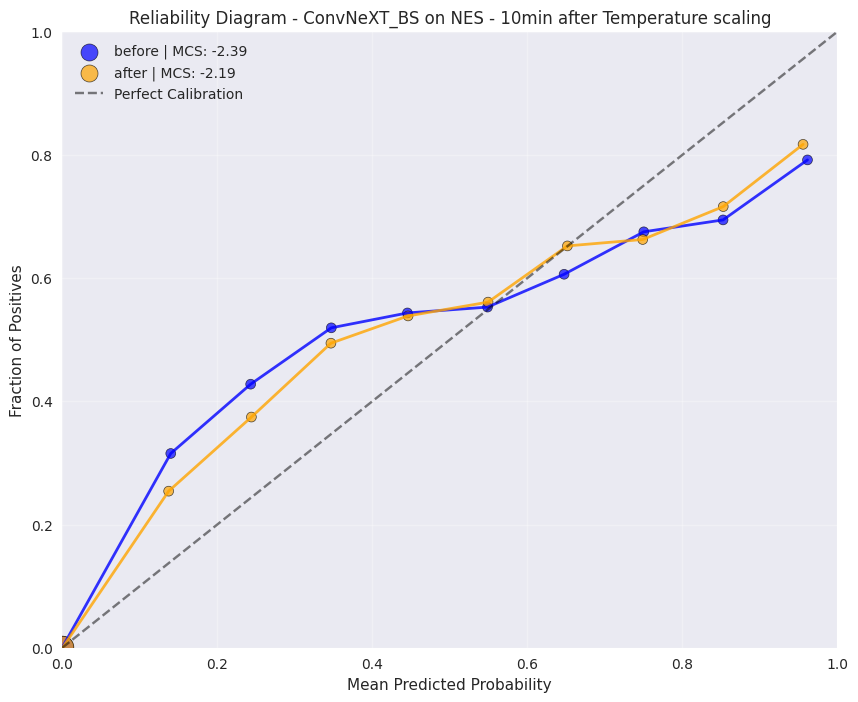

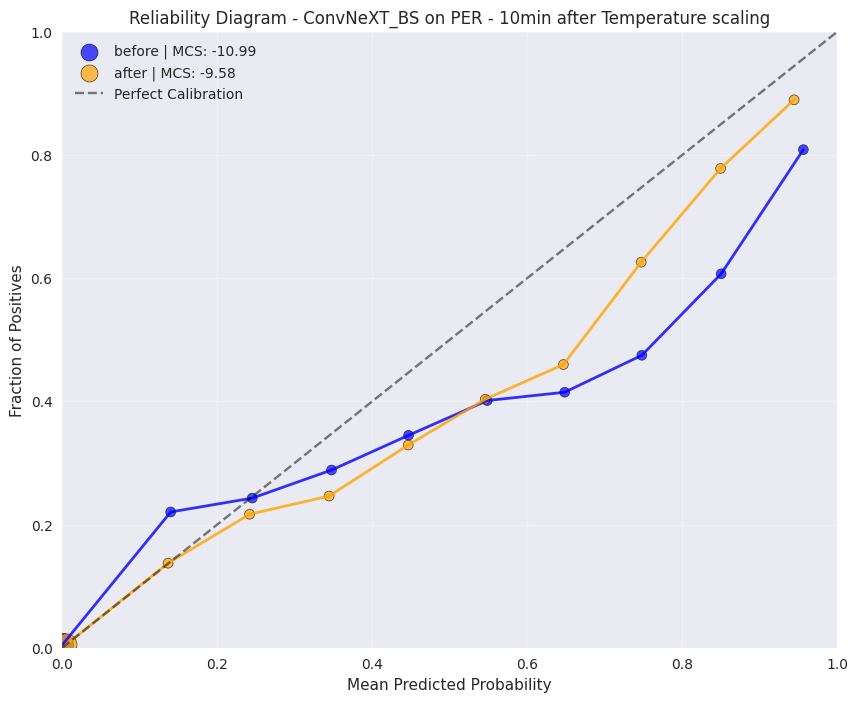

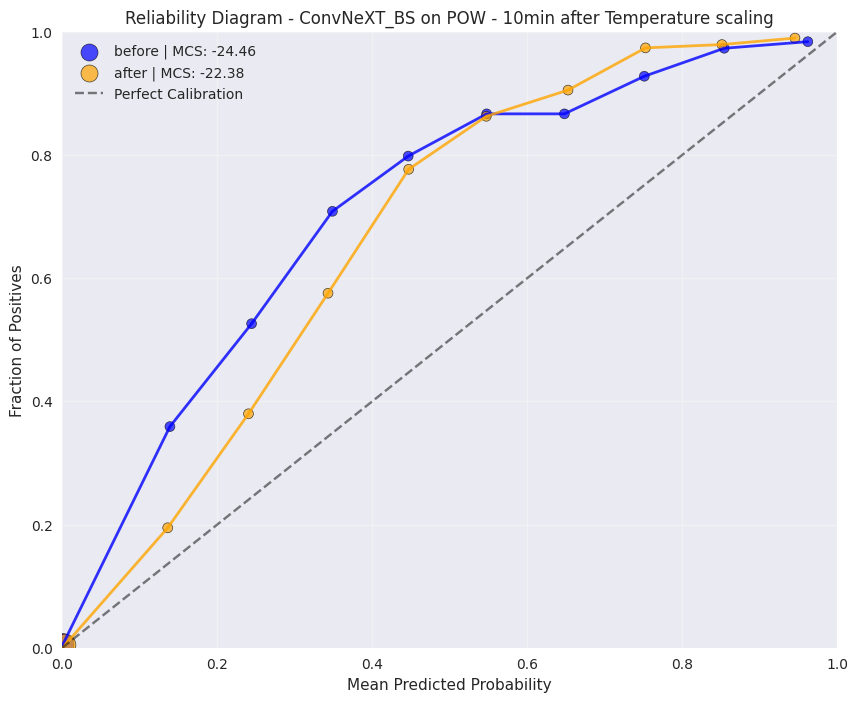

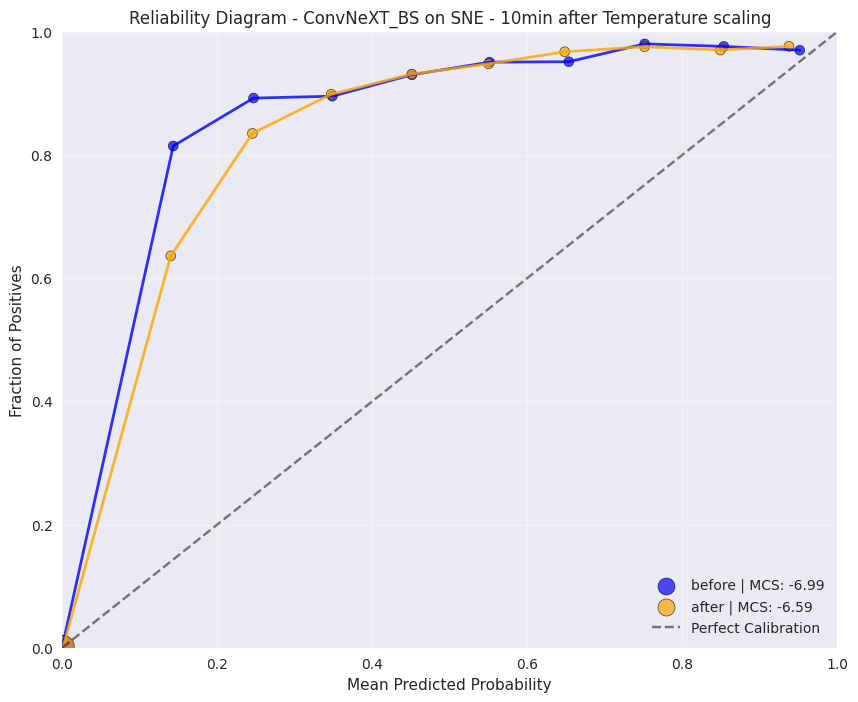

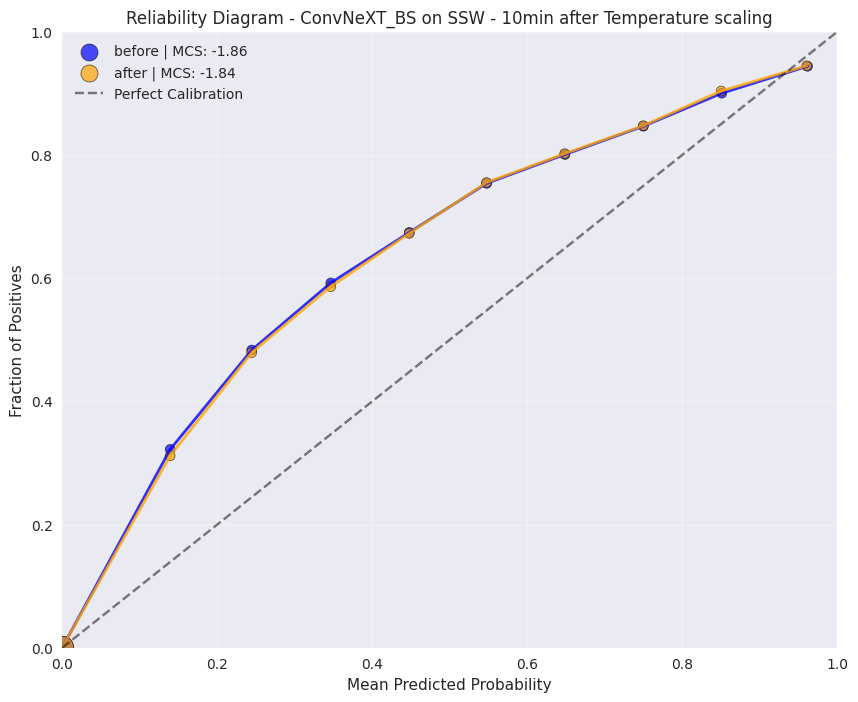

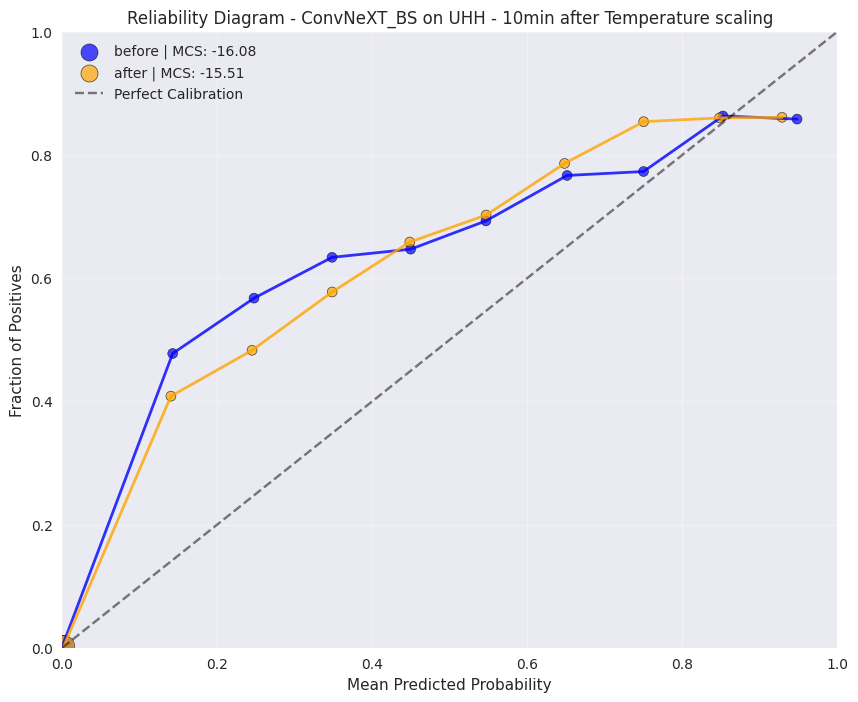

In [11]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after Temperature scaling",
    )

### Platt scaling

In [12]:
from uncertainbird.utils.temperature_scaling import fit_per_class_platt_scaling


for ds in valid_keys:

    # compute global temperature value based on POW
    slopes, biases = fit_per_class_platt_scaling(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )

    print(f"Optimal slopes: {slopes}, biases: {biases} for {ds}")

    data_120[ds+'_test']["predictions_ts"] = apply_platt_scaling(
        data_120[ds+'_test']["logits"], slopes, biases, model= model
    )
    print('Before platt scaling:')
    data_120[ds+'_test']["metrics"] = print_metrics(
        data_120[ds+'_test']["predictions"], data_120[ds+'_test']["targets"]
    )
    print('After platt scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Optimal slopes: tensor([1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.9433, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.9343, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 1.6465, 1.6465, 1.6465, 1.8705, 1.6465, 1.6465, 1.6465,
        1.6465, 1.6465, 

Accuracy: tensor(0.9971)
cmAP: tensor(0.6088)
Precision: tensor(0.0957)
Recall: tensor(0.0436)
F1 Score: tensor(0.0555)
AUROC: tensor(0.1129)
ECE: tensor(0.0020)
ECE Weighted: tensor(0.0184)
ECE Top-3: tensor(0.0295)
ECE Top-5: tensor(0.0256)
ECE Top-10: tensor(0.0227)
ECE Top-21: tensor(0.0212)
Miscalibration Score (MCS): tensor(-0.0060)
ECE Under-confidence: tensor(0.0122)
ECE Over-confidence: tensor(0.0062)
Optimal slopes: tensor([ 1.6465,  1.6465,  1.8350,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.8522,  1.6465,  2.2764,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1.8301,  1.9402,  1.6465,  1.6159,  0.3648,  0.5159,  3.0614,  1.6465,
         1.9664,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.7295,  1.6465,
         1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6571,  1.6465,  1.6465,
         1.9566,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,  1.6465,
         1

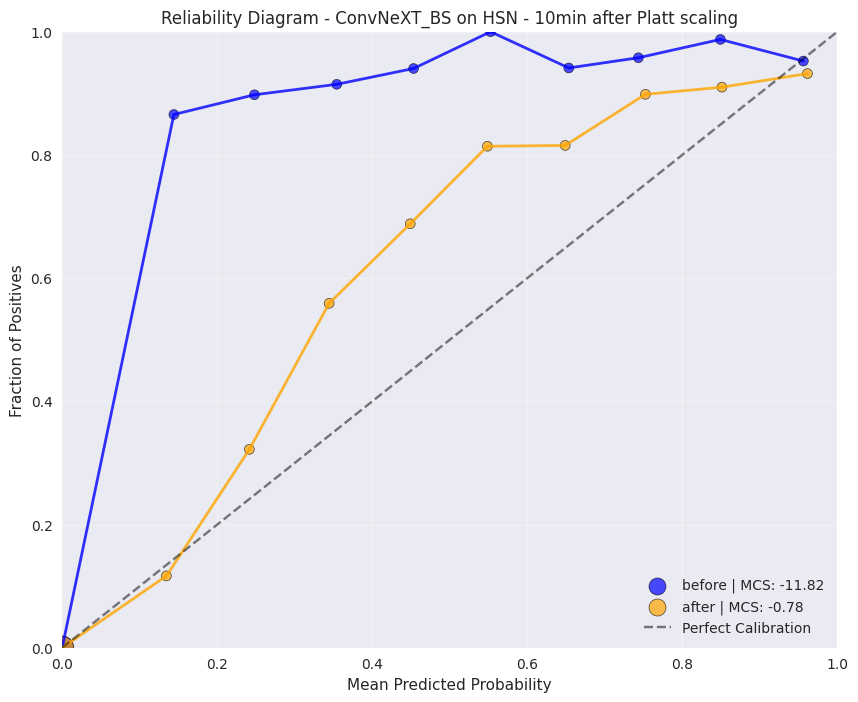

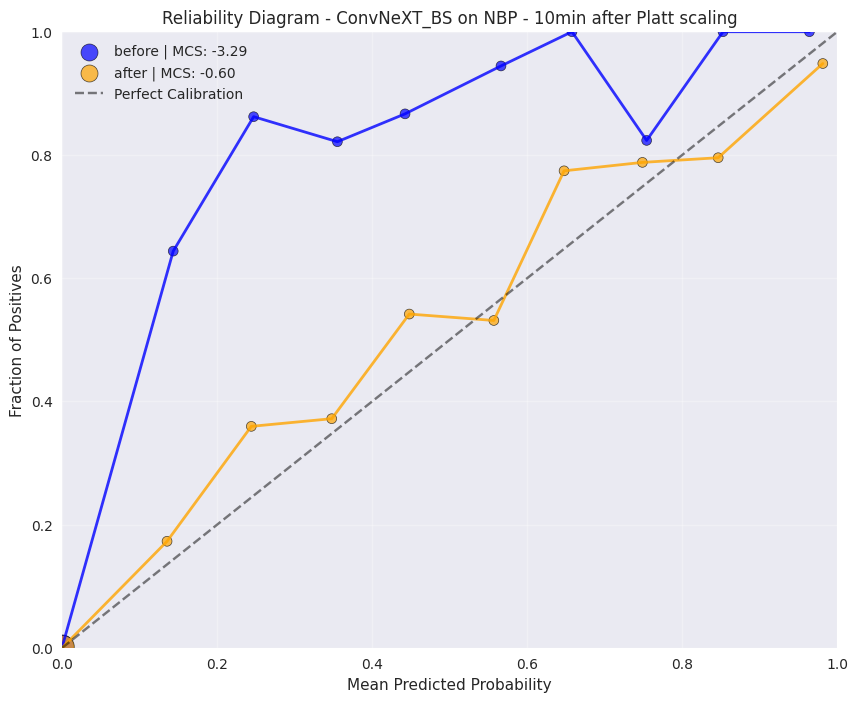

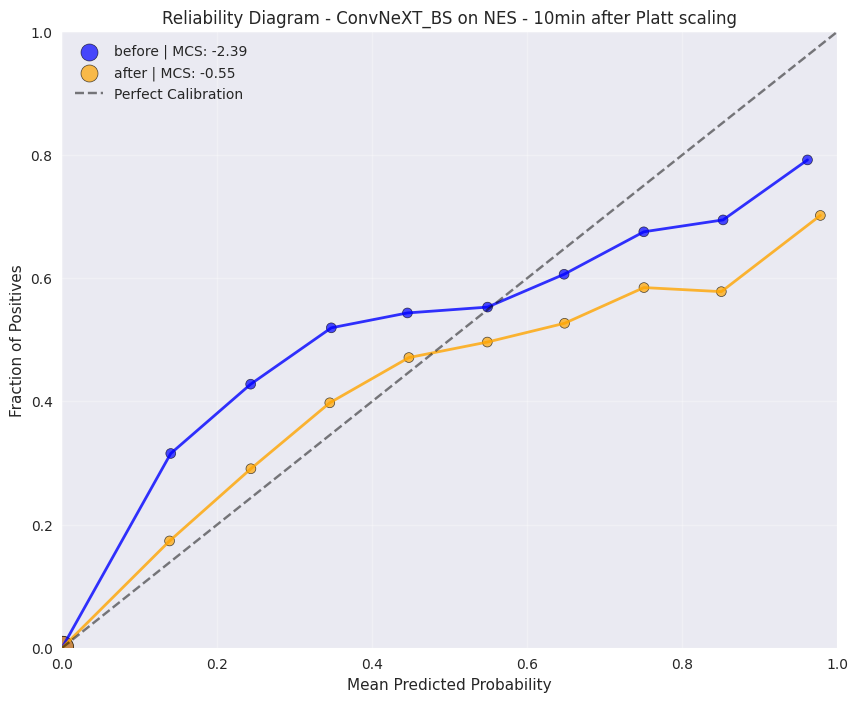

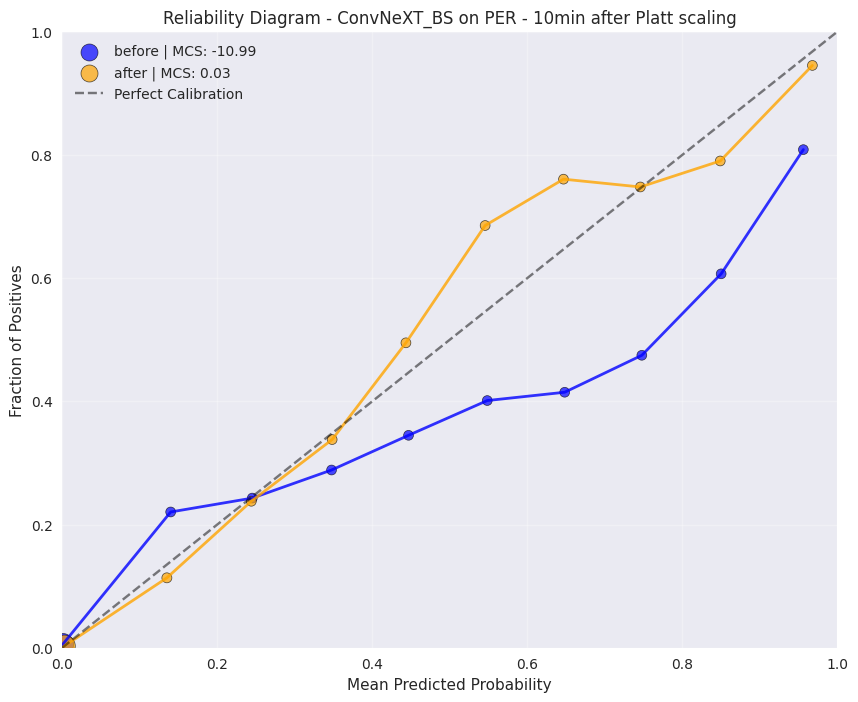

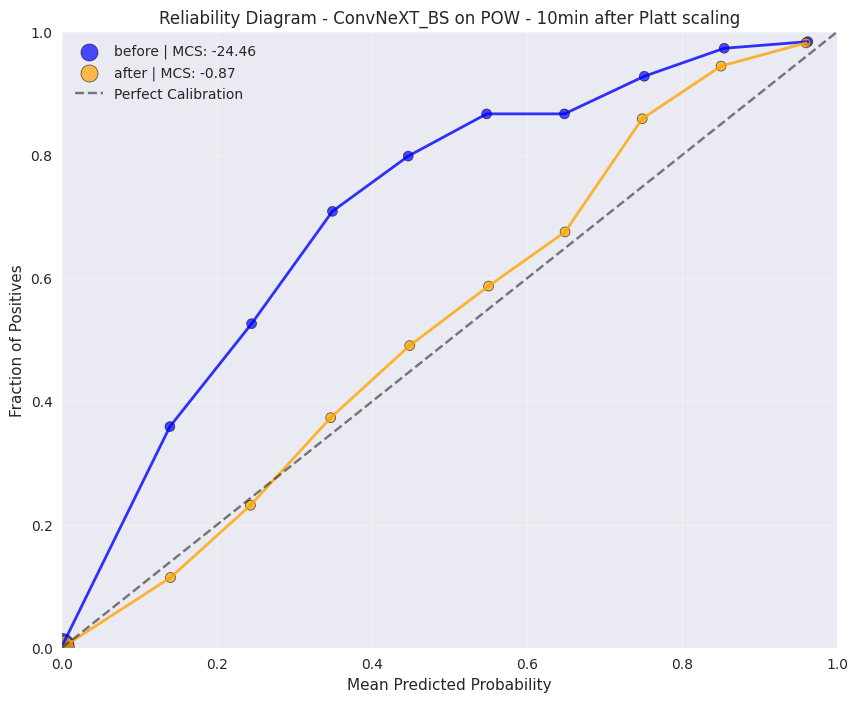

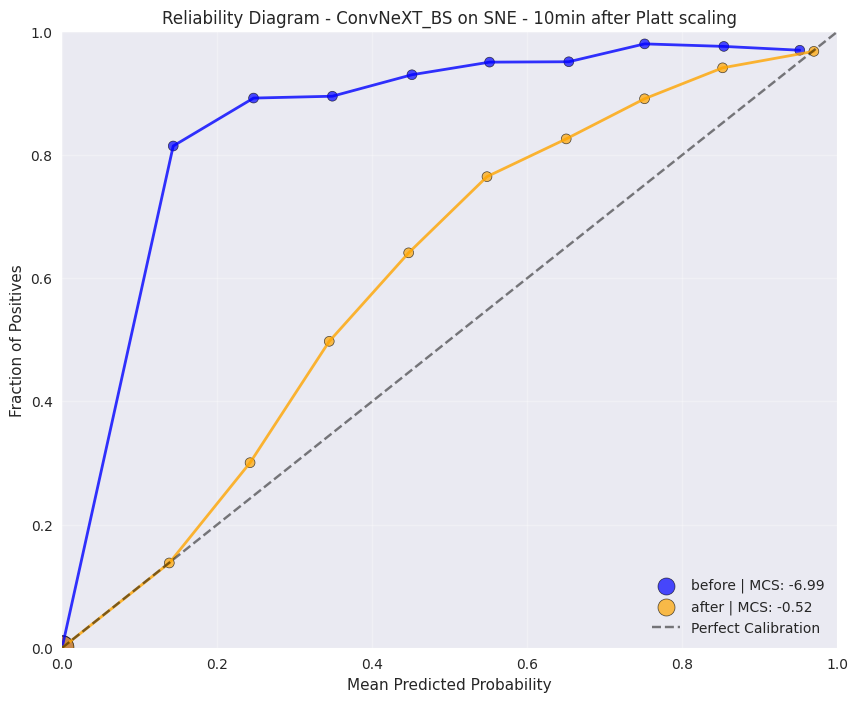

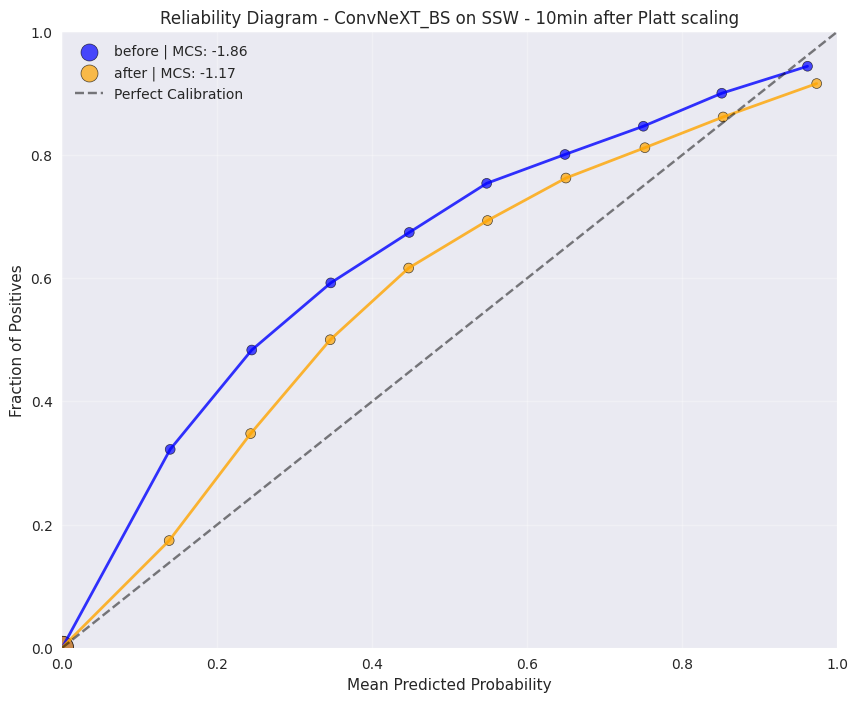

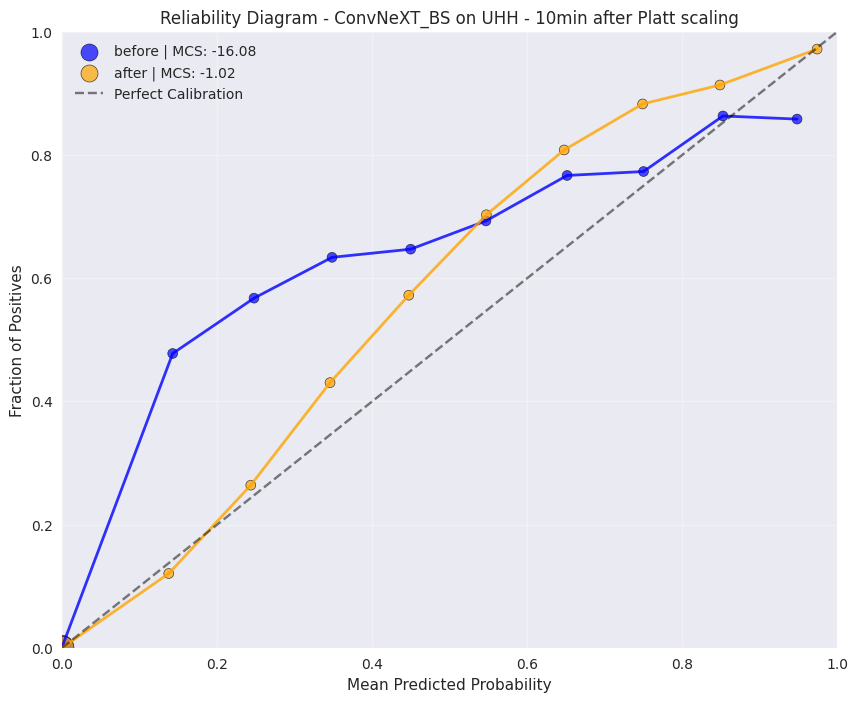

In [13]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after Platt scaling",
    )

## Parameters per class

### Temperature scaling

In [14]:
from uncertainbird.utils.temperature_scaling import fit_per_class_temperatures


for ds in valid_keys:

    print(f"Fit temperatures per class for {ds}")
    # compute global temperature value based on POW
    temperatures = fit_per_class_temperatures(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )


    data_120[ds+'_test']["predictions_ts"] = apply_temperature_scaling(
        data_120[ds+'_test']["logits"], temperatures, model= model
    )
    print('Before temperature scaling:')
    data_120[ds+'_test']["metrics"] = print_metrics(
        data_120[ds+'_test']["predictions"], data_120[ds+'_test']["targets"]
    )
    print('After temperature scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Fit temperatures per class for HSN
Before temperature scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4871)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0012)
ECE Weighted: tensor(0.1182)
ECE Top-3: tensor(0.1179)
ECE Top-5: tensor(0.0856)
ECE Top-10: tensor(0.0474)
ECE Top-21: tensor(0.0230)
Miscalibration Score (MCS): tensor(-0.1182)
ECE Under-confidence: tensor(0.1182)
ECE Over-confidence: tensor(3.4392e-05)
After temperature scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4871)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0007)
ECE Weighted: tensor(0.0672)
ECE Top-3: tensor(0.0707)
ECE Top-5: tensor(0.0513)
ECE Top-10: tensor(0.0279)
ECE Top-21: tensor(0.0136)
Miscalibration Score (MCS): tensor(-0.0371)
ECE Under-confidence: tensor(0.0521)
ECE Over-confidence: tensor(0.0150)
Fit temperatures per class for NBP
Before temperature scaling:
Accuracy: tenso

Accuracy: tensor(0.9990)
cmAP: tensor(0.3447)
Precision: tensor(0.0942)
Recall: tensor(0.0319)
F1 Score: tensor(0.0416)
AUROC: tensor(0.1876)
ECE: tensor(0.0010)
ECE Weighted: tensor(0.0246)
ECE Top-3: tensor(0.0497)
ECE Top-5: tensor(0.0362)
ECE Top-10: tensor(0.0237)
ECE Top-21: tensor(0.0148)
Miscalibration Score (MCS): tensor(-0.0239)
ECE Under-confidence: tensor(0.0243)
ECE Over-confidence: tensor(0.0004)
After temperature scaling:
Accuracy: tensor(0.9990)
cmAP: tensor(0.3438)
Precision: tensor(0.0942)
Recall: tensor(0.0319)
F1 Score: tensor(0.0416)
AUROC: tensor(0.1873)
ECE: tensor(0.0008)
ECE Weighted: tensor(0.0144)
ECE Top-3: tensor(0.0273)
ECE Top-5: tensor(0.0198)
ECE Top-10: tensor(0.0141)
ECE Top-21: tensor(0.0102)
Miscalibration Score (MCS): tensor(-0.0079)
ECE Under-confidence: tensor(0.0112)
ECE Over-confidence: tensor(0.0032)
Fit temperatures per class for PER
Before temperature scaling:
Accuracy: tensor(0.9941)
cmAP: tensor(0.1761)
Precision: tensor(0.1071)
Recall: te

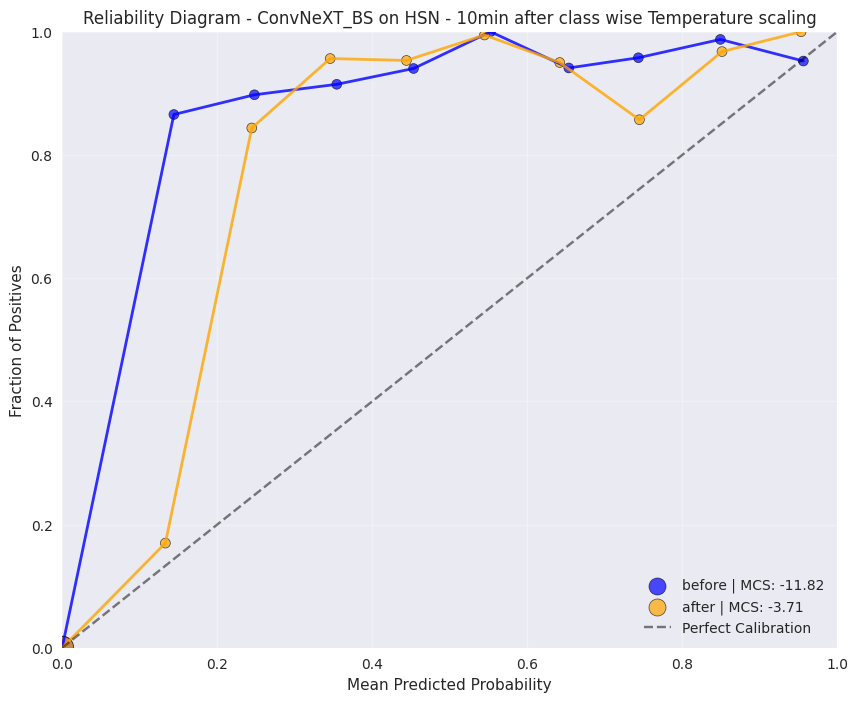

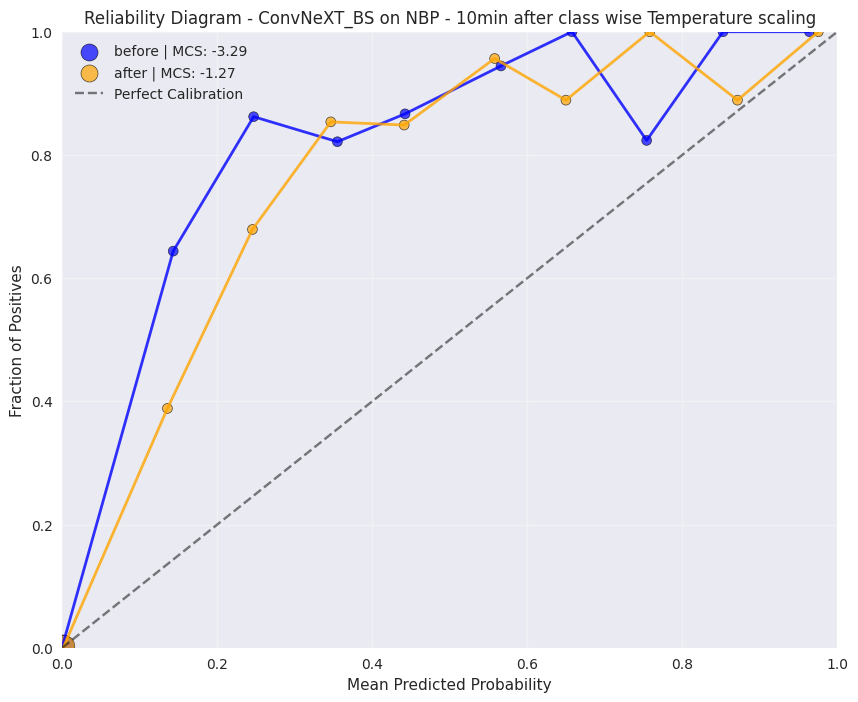

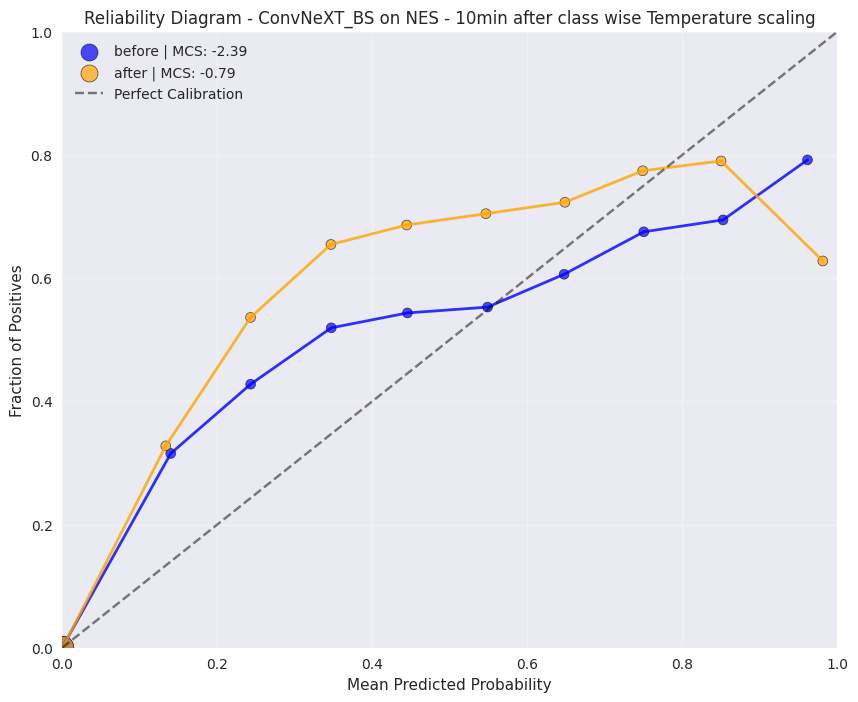

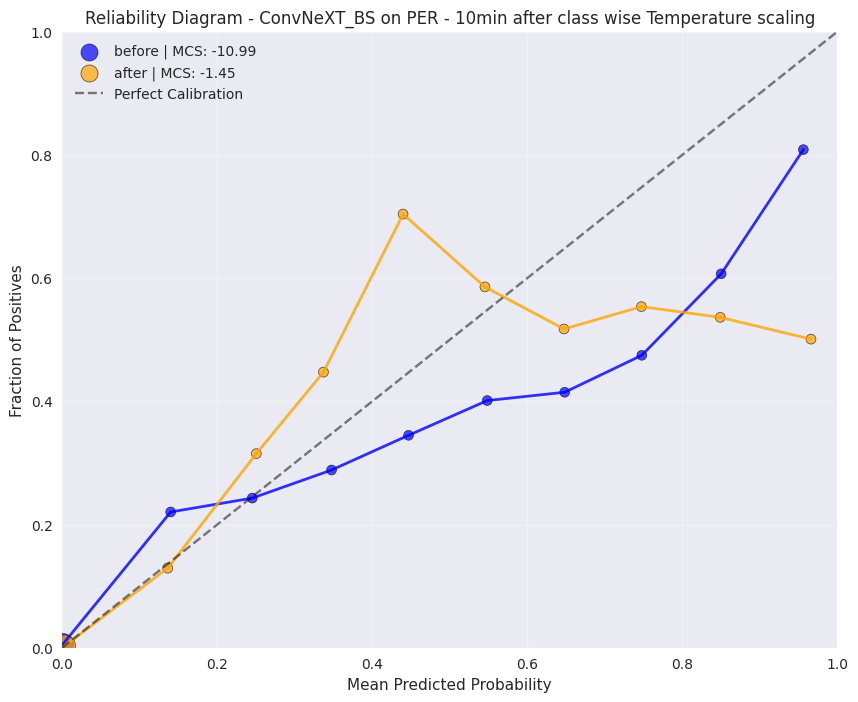

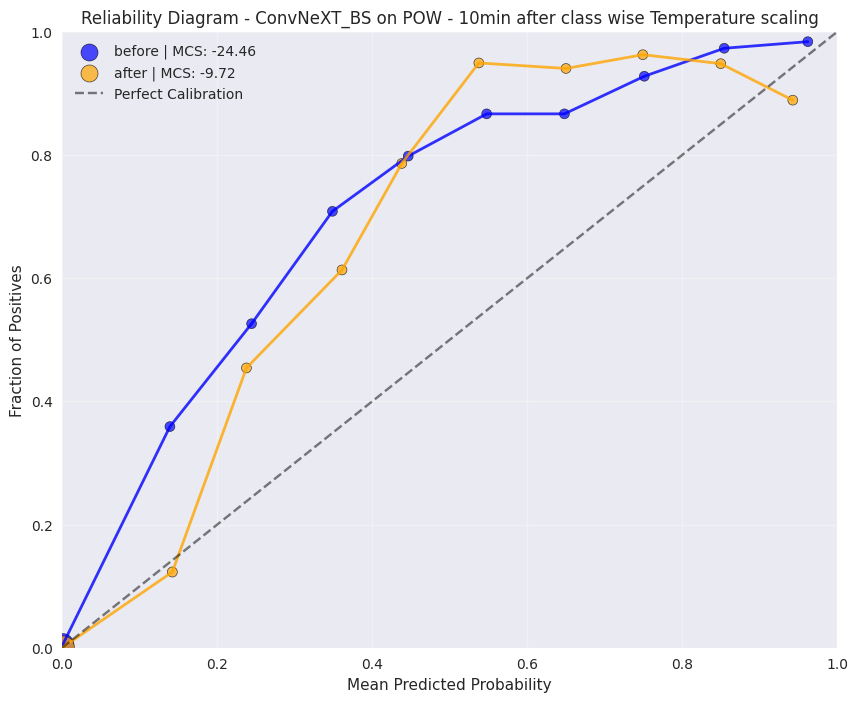

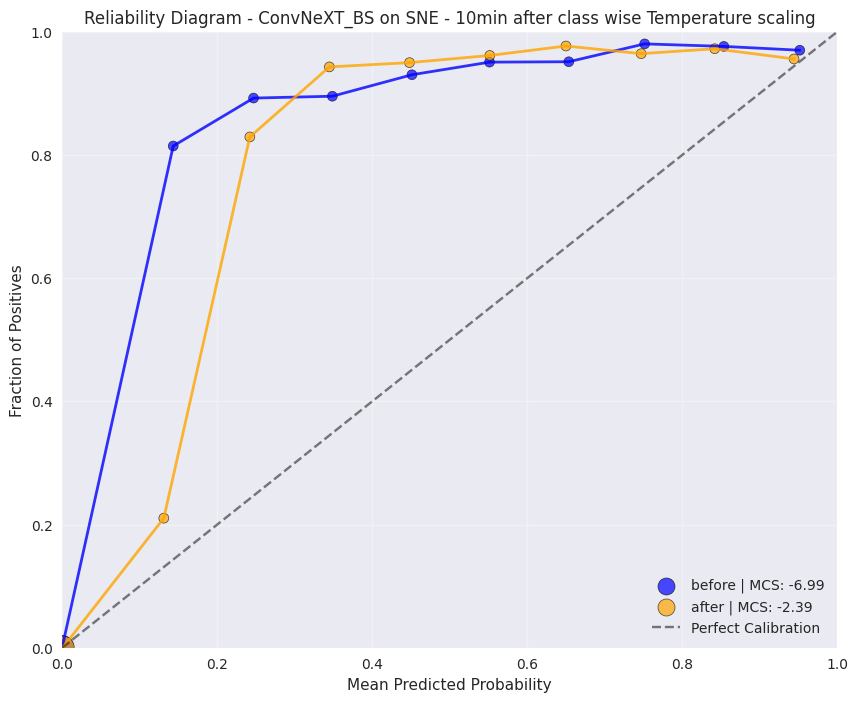

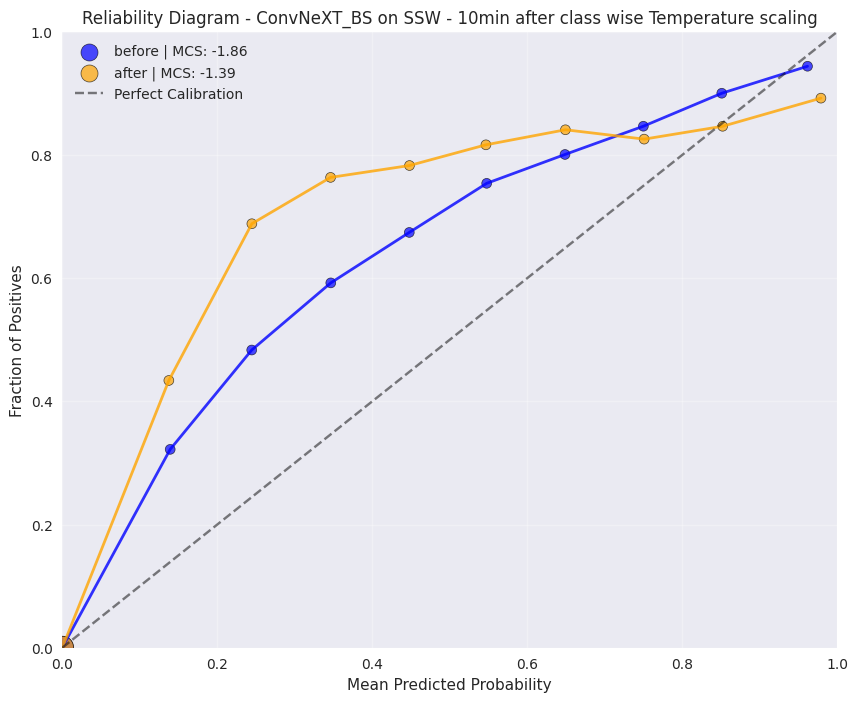

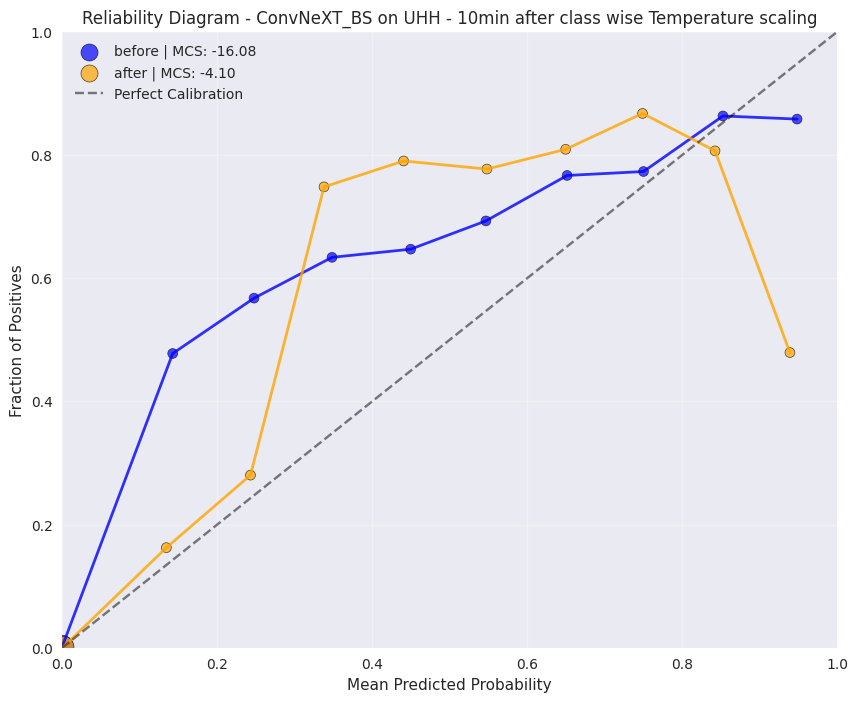

In [15]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after class wise Temperature scaling",
    )

### Platt scaling

In [16]:
for ds in valid_keys:

    # compute global temperature value based on POW
    slope, bias = fit_global_platt_scaling(
        data[ds+'_cal']["logits"], data_120[ds+'_cal']["targets"], 1000, lr=0.01
    )

    print(f"Optimal slope: {slope:.3f}, bias: {bias:.3f} for {ds}")

    data_120[ds+'_test']["predictions_ts"] = apply_platt_scaling(
        data_120[ds+'_test']["logits"], slope, bias, model= model
    )
    print('Before platt scaling:')
    data_120[ds+'_test']["metrics"] = print_metrics(
        data_120[ds+'_test']["predictions"], data_120[ds+'_test']["targets"]
    )
    print('After platt scaling:')
    data_120[ds+'_test']["metrics_ts"] = print_metrics(
        data_120[ds+'_test']["predictions_ts"], data_120[ds+'_test']["targets"]
    )

Optimal slope: 0.742, bias: 0.056 for HSN
Before platt scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4871)
Precision: tensor(0.0299)
Recall: tensor(0.0042)
F1 Score: tensor(0.0069)
AUROC: tensor(0.0454)
ECE: tensor(0.0012)
ECE Weighted: tensor(0.1182)
ECE Top-3: tensor(0.1179)
ECE Top-5: tensor(0.0856)
ECE Top-10: tensor(0.0474)
ECE Top-21: tensor(0.0230)
Miscalibration Score (MCS): tensor(-0.1182)
ECE Under-confidence: tensor(0.1182)
ECE Over-confidence: tensor(3.4392e-05)
After platt scaling:
Accuracy: tensor(0.9988)
cmAP: tensor(0.4871)
Precision: tensor(0.0299)
Recall: tensor(0.0043)
F1 Score: tensor(0.0070)
AUROC: tensor(0.0454)
ECE: tensor(0.0018)
ECE Weighted: tensor(0.1152)
ECE Top-3: tensor(0.1152)
ECE Top-5: tensor(0.0827)
ECE Top-10: tensor(0.0451)
ECE Top-21: tensor(0.0228)
Miscalibration Score (MCS): tensor(-0.1151)
ECE Under-confidence: tensor(0.1152)
ECE Over-confidence: tensor(5.1300e-05)
Optimal slope: 1.077, bias: 2.764 for NBP
Before platt scaling:
Accuracy: tenso

Accuracy: tensor(0.9941)
cmAP: tensor(0.1761)
Precision: tensor(0.1074)
Recall: tensor(0.0133)
F1 Score: tensor(0.0187)
AUROC: tensor(0.2336)
ECE: tensor(0.0076)
ECE Weighted: tensor(0.1002)
ECE Top-3: tensor(0.1964)
ECE Top-5: tensor(0.1565)
ECE Top-10: tensor(0.0947)
ECE Top-21: tensor(0.0610)
Miscalibration Score (MCS): tensor(-0.0955)
ECE Under-confidence: tensor(0.0978)
ECE Over-confidence: tensor(0.0023)
Optimal slope: 0.847, bias: 1.354 for POW
Before platt scaling:
Accuracy: tensor(0.9940)
cmAP: tensor(0.3403)
Precision: tensor(0.0520)
Recall: tensor(0.0085)
F1 Score: tensor(0.0129)
AUROC: tensor(0.0954)
ECE: tensor(0.0057)
ECE Weighted: tensor(0.2452)
ECE Top-3: tensor(0.3397)
ECE Top-5: tensor(0.2637)
ECE Top-10: tensor(0.1842)
ECE Top-21: tensor(0.1032)
Miscalibration Score (MCS): tensor(-0.2446)
ECE Under-confidence: tensor(0.2449)
ECE Over-confidence: tensor(0.0003)
After platt scaling:
Accuracy: tensor(0.9942)
cmAP: tensor(0.3403)
Precision: tensor(0.0562)
Recall: tensor(

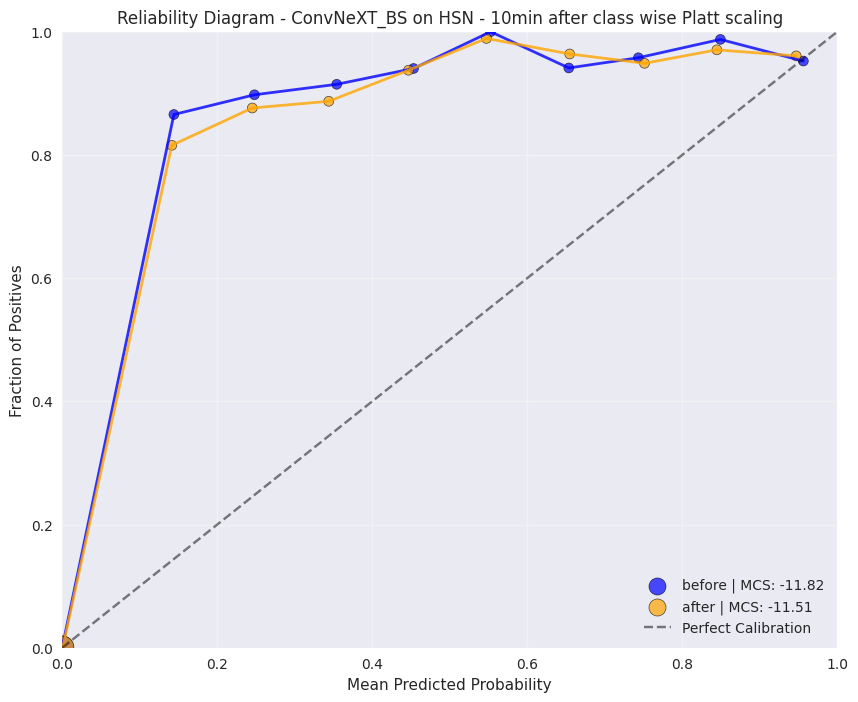

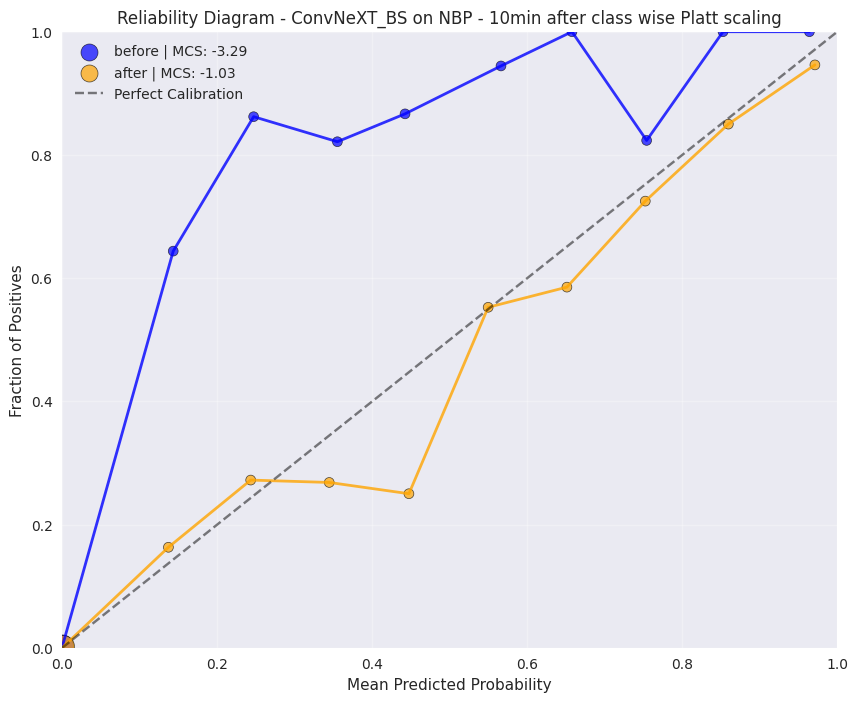

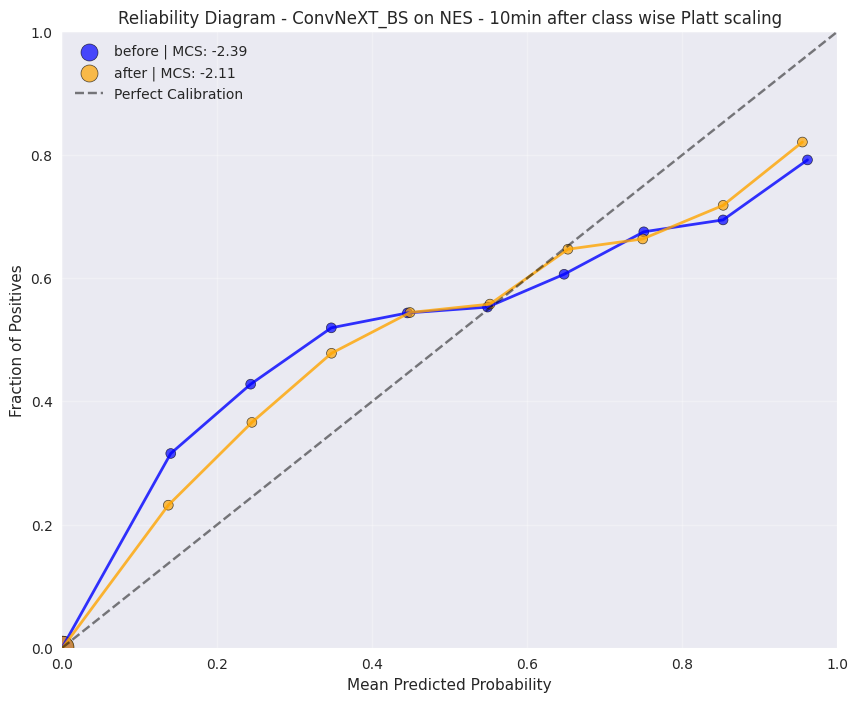

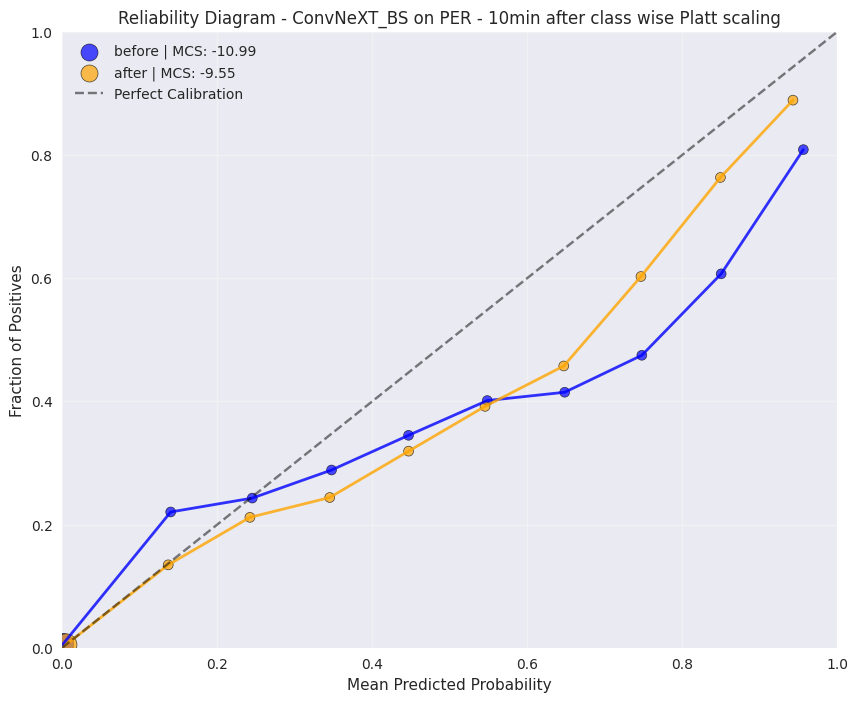

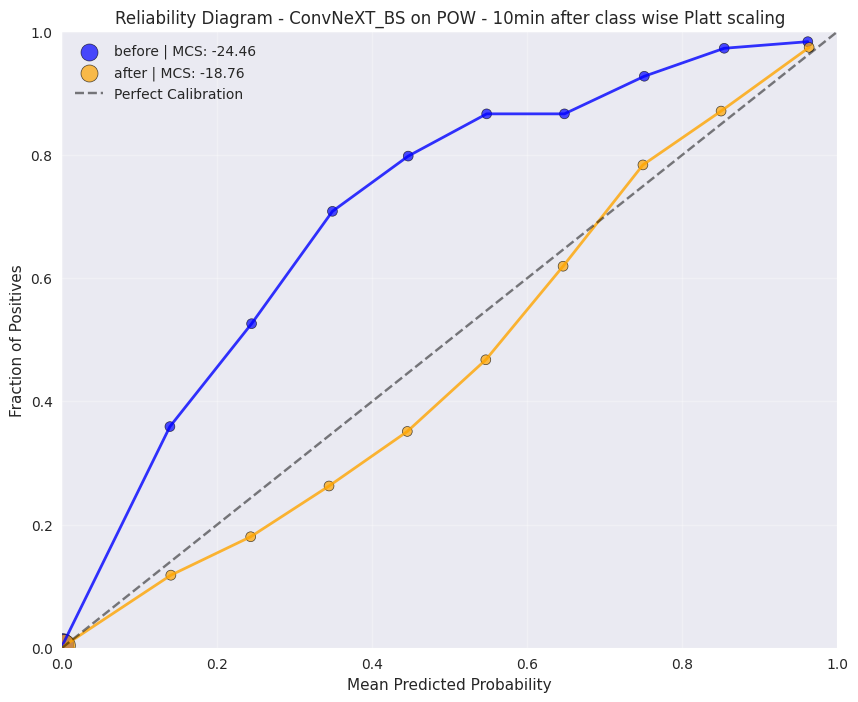

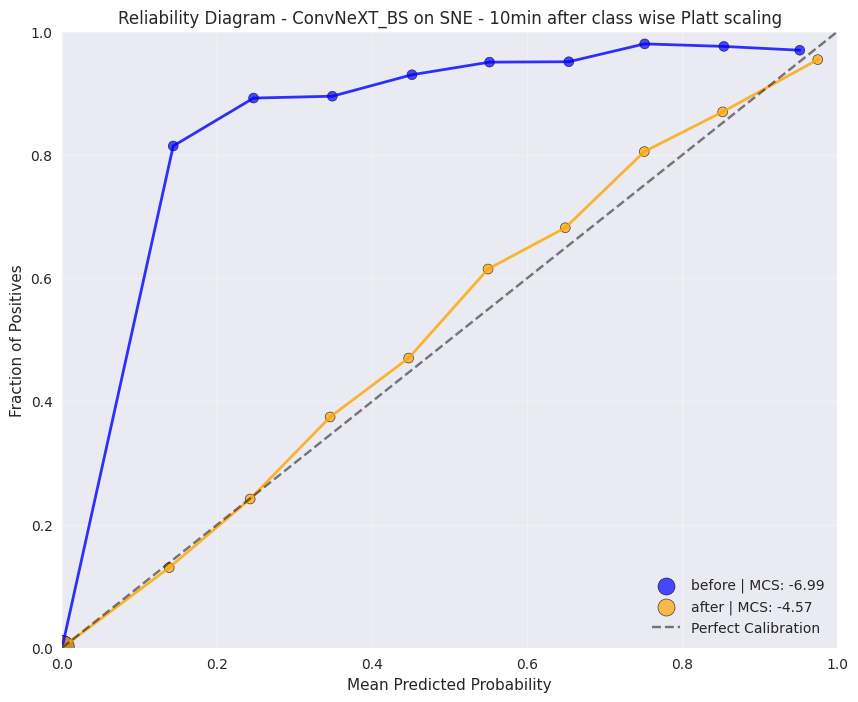

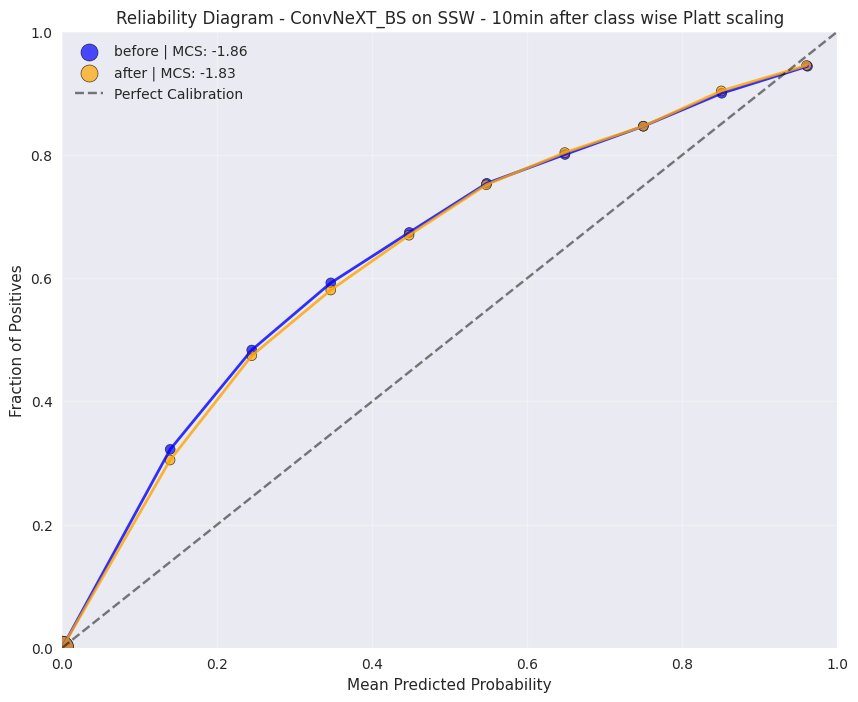

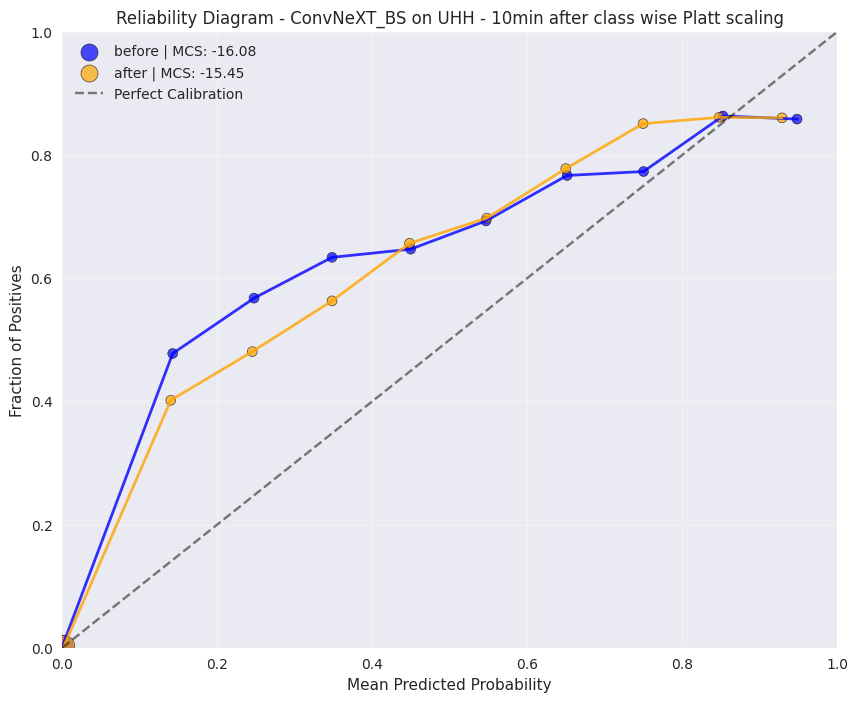

In [17]:
# compute metrics for HSN_test after temperature scaling
from uncertainbird.utils.plotting import (
    plot_combined_reliability_diagram,
)


for dataset_name in valid_keys:
    # reliability diagram after temperature scaling including before and after
    combined_data = {
        "before": {
            "predictions": data[dataset_name + "_test"]["predictions"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "blue",
            "metrics": data_120[dataset_name + "_test"]["metrics"],
        },
        "after": {
            "predictions": data_120[dataset_name + "_test"]["predictions_ts"],
            "targets": data_120[dataset_name + "_test"]["targets"],
            "color": "orange",
            "metrics": data_120[dataset_name + "_test"]["metrics_ts"],
        },
    }
    plot_combined_reliability_diagram(
        combined_data,
        n_bins=10,
        title=f"Reliability Diagram - {model_name} on {dataset_name} - 10min after class wise Platt scaling",
    )